# EDA Project

# Project Proposal

I have chosen to look at a data file countaining food inspection reports from 2010 to the present in the Chicago area. This data comes from the City of Chicago website: https://data.cityofchicago.org/Health-Human-Services/Food-Inspections/4ijn-s7e5

The data file has several variables stored such as "Risk Type", "Facility Type", and "Location" of facility. This allows for an indepth study of the state of food safety in the Chicago area. I am going to focus on the above mentioned fields in addition to the "Violation Type" field that provides a discription of the violation for the case.

I intend to perform a location based analysis of restraunt safety by studying what causes the most violations in a given zip code. Additionally I intend to asses the severity of the violations listed by computing the probability of a facility's closure due to a given violation.

In [9]:
#!pip install geopandas

In [10]:
#importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

%matplotlib inline

In [11]:
data = pd.read_csv('Food_Inspections_20231017.csv')
copy = pd.read_csv('Food_Inspections_20231017.csv')

In [12]:
# Set up notebook to display multiple outputs in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [13]:
# TODO: Use the info() method to determine to inspect the variable (column) names, the number of non-null values,
#       and the data types for each variable.
data.info()
# TODO: Use the head() method to inspect the first five (or more) rows of the data
data.head()
# TODO: Use the tail() method to inspect the last five (or more) rows of the data
data.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261533 entries, 0 to 261532
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Inspection ID    261533 non-null  int64  
 1   DBA Name         261533 non-null  object 
 2   AKA Name         259047 non-null  object 
 3   License #        261525 non-null  float64
 4   Facility Type    256413 non-null  object 
 5   Risk             261452 non-null  object 
 6   Address          261533 non-null  object 
 7   City             261345 non-null  object 
 8   State            261475 non-null  object 
 9   Zip              261447 non-null  float64
 10  Inspection Date  261533 non-null  object 
 11  Inspection Type  261532 non-null  object 
 12  Results          261533 non-null  object 
 13  Violations       190106 non-null  object 
 14  Latitude         260636 non-null  float64
 15  Longitude        260636 non-null  float64
 16  Location         260636 non-null  obje

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2583380,CERES' TABLE,CERES' TABLE,2137239.0,Restaurant,Risk 1 (High),3124 N BROADWAY,CHICAGO,IL,60657.0,10/13/2023,Canvass,Out of Business,NaN,41.938412,-87.644492,"(41.93841197166044, -87.64449180403412)"
1,2583322,BRITISH INTERNATIONAL SCHOOL OF CHICAGO LINCOL...,NaN,2718080.0,Children's Services Facility,Risk 1 (High),821 W EASTMAN ST,CHICAGO,IL,60642.0,10/13/2023,Canvass,Pass,47. FOOD & NON-FOOD CONTACT SURFACES CLEANABLE...,41.907350,-87.649171,"(41.90735030771109, -87.64917064303643)"
2,2583327,DOG HAUS,DOG HAUS,2536489.0,Restaurant,Risk 1 (High),2464-2466 N LINCOLN AVE,CHICAGO,IL,60614.0,10/13/2023,Complaint Re-Inspection,Fail,37. FOOD PROPERLY LABELED; ORIGINAL CONTAINER ...,41.926745,-87.650790,"(41.92674471870681, -87.65078998020067)"
3,2583318,KINZIE HOTEL,KINZIE HOTEL,2608572.0,Restaurant,Risk 2 (Medium),20 W KINZIE ST,CHICAGO,IL,60654.0,10/13/2023,Canvass Re-Inspection,Pass,NaN,41.889352,-87.628849,"(41.889352033013864, -87.62884885027287)"
4,2583304,BRUNA'S CAFE,BRUNA'S CAFE,1212.0,Restaurant,Risk 1 (High),2424 S OAKLEY AVE,CHICAGO,IL,60608.0,10/12/2023,Canvass,Fail,10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLI...,41.847574,-87.683216,"(41.847573840855105, -87.68321583947979)"


,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
261528,118315,KEN TONE'S DRIVE-IN,KEN TONE'S DRIVE-IN,57133.0,Restaurant,Risk 1 (High),551 W 18TH ST,CHICAGO,IL,60616.0,01/19/2010,Canvass,Pass,"30. FOOD IN ORIGINAL CONTAINER, PROPERLY LABEL...",41.857525,-87.640916,"(41.85752450274652, -87.64091638453037)"
261529,67955,FLAT TOP GRILL,FLAT TOP GRILL,42597.0,Restaurant,Risk 1 (High),1400 W BELMONT AVE,CHICAGO,IL,60657.0,01/20/2010,Canvass,Fail,18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...,41.939873,-87.663945,"(41.939872615605175, -87.66394524436866)"
261530,72245,ANNA PURANA FAST FOOD,ANNAPURNA FAST FOOD,13388.0,Restaurant,Risk 1 (High),2608 W DEVON AVE,CHICAGO,IL,60659.0,01/25/2010,Complaint,Pass w/ Conditions,3. POTENTIALLY HAZARDOUS FOOD MEETS TEMPERATUR...,41.997748,-87.695167,"(41.99774834781197, -87.69516655049145)"
261531,68254,"Eastside Soccer Dome, Inc.",NaN,2009231.0,Restaurant,Risk 2 (Medium),11919 S Avenue O AVE FL,CHICAGO,IL,60617.0,01/06/2010,License,Fail,2. FACILITIES TO MAINTAIN PROPER TEMPERATURE -...,41.678517,-87.539894,"(41.67851714188012, -87.53989365304756)"
261532,67778,LOS ARCOS PIZZERIA,LOS ARCOS PIZZERIA,2004575.0,Restaurant,Risk 1 (High),6102 W DIVERSEY AVE,CHICAGO,IL,60639.0,01/06/2010,License Re-Inspection,Pass,NaN,41.931213,-87.778537,"(41.93121276602796, -87.77853673674818)"


# EDA Phase 1

I want to do a spatial analysis of food inspections in the Chicago area by mapping all inspection types, risk levels, and inspection results over all zip codes. I want to see how these values have changed over time. And I want to compare the highest and lowest zip codes for each of these variables. I hope to learn the reason for teh discrepencies.

The population being represented are inspection results for food establishments in the Chicago area. The sample size prior to data cleaning is 261,533 cases. This data is a record of every inspection conducted by Chicago Public Health between January 2010 and October 2023. Below are listed some of the important fields in the database.

1. 'DBA Name': The name under which the establishment does buisness: sting
2. 'License #': The unique id for each establishment in the data field: float
3. 'Risk': The level of risk assigned to the establishment: string
4. 'Zip': The zip code of the establishment : float
5. 'Inspection Date': The date of the inspection: string
6. 'Inspection Type': The type of inspection being conducted: string
7. 'Location': The coordinates of the establishment: string

# Checking for unique entries in Lisence # and Location Columns
First I would like to see if 'License #' or 'Location' is the better ID field, i.e. which of them are unique to every restraurant.

In [14]:
data['Location'].value_counts()  #897 missing fields 
data['License #'].value_counts() #8 + 681 = 689 missing fields   


Location
(42.008536400868735, -87.91442843927047)    3244
(41.789329323265385, -87.74164564419637)     745
(41.884187507127805, -87.64111966683218)     576
(41.88199433820508, -87.6397586848809)       575
(41.85045102427, -87.65879785567869)         572
                                            ... 
(41.77893155690846, -87.69841709348002)        1
(41.85242412467653, -87.63599569065158)        1
(41.83125166563684, -87.62311549138428)        1
(41.945560104541954, -87.70764653233294)       1
(41.88686665645442, -87.65087593435203)        1
Name: count, Length: 18117, dtype: int64

License #
0.0          681
1354323.0    198
14616.0      181
1574001.0     86
60184.0       63
            ... 
2627468.0      1
2652809.0      1
1495908.0      1
2641557.0      1
1998048.0      1
Name: count, Length: 43978, dtype: int64

Here we can see that both 'Location' and 'Lisince #' have several hundred repeats on the higher end, which would seem to imply that neither of them is a good unique ID field. This is because you would not expect a single restraurant to be represented 681 times in this data frame, let alone a 3244 times, because it would imply that a single restraurant was inspected 681 or more times between January 2010 and today. This would mean that this hypothetical restraurant would on average recieve an inspection every week continously for 10 years. Furthermore having so many 'Locations' repeated also does not make sense as you would not expect 3244 inspections at the same location, no matter the circumstances. So it seems that neither of these fields uniquely correlate to an establishment in the data frame.

However, we can take a closer look at these repeats to see what is actually going on here: First looking at 'Location', doing a google searches of the high value count coordinates reveals that the repeat locations are major airports, train stations, and other such venues. For example the location with 3244 counts is where O'Hare International Airport is located. Furthermore, looking at the cases with this position as the location brings up establishments that do, or did exist within O'Hare at some point. What is more, each field has a unique 'Licence #' despite shareing the same location value. I visually established this though the KNIME platform and so will not include it in this notebook to avoid clutter.

Concerning 'Licence #', the 681 repeats repeats I mentioned previously turn out to be a misleading statistic, because the licence number for these repeats is 0.0, which is not a valid licence number, and so should not be considered in the analysis. We can look at the next few most repeated values:

In [15]:
#Looking at the first 3 repeated license # not including #0.
data[data['License #']==1354323.0].head(3)
data[data['License #']==1354323.0].tail(3)

data[data['License #']==14616.0].head(3)
data[data['License #']==14616.0].tail(3)

data[data['License #']==1574001.0].head(3)
data[data['License #']==1574001.0].tail(3)

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
22719,1375429,SPORTSERVICE SOLDIER FIELD,1ST DOWN FRANK,1354323.0,Restaurant,Risk 2 (Medium),1410 S MUSEUM CAMPUS DR,CHICAGO,IL,60605.0,11/14/2013,Canvass,Out of Business,NaN,41.862628,-87.615031,"(41.862628294037634, -87.61503109411332)"
22724,1375406,SPORTSERVICE SOLDIER FIELD,SOUTHSIDE BRATS,1354323.0,Restaurant,Risk 2 (Medium),1410 S MUSEUM CAMPUS DR,CHICAGO,IL,60605.0,11/14/2013,Canvass,Out of Business,NaN,41.862628,-87.615031,"(41.862628294037634, -87.61503109411332)"
22725,1375399,SPORTSERVICE SOLDIER FIELD,SMOKE HOUSE,1354323.0,Restaurant,Risk 2 (Medium),1410 S MUSEUM CAMPUS DR,CHICAGO,IL,60605.0,11/14/2013,Canvass,Out of Business,NaN,41.862628,-87.615031,"(41.862628294037634, -87.61503109411332)"


,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
256538,112426,SPORTSERVICE SOLDIER FIELD,PIZZA STAND,1354323.0,Restaurant,Risk 2 (Medium),1410 S MUSEUM CAMPUS DR,CHICAGO,IL,60605.0,06/07/2010,Canvass,Pass,33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSI...,41.862628,-87.615031,"(41.862628294037634, -87.61503109411332)"
256673,205347,SPORTSERVICE SOLDIER FIELD,GAME DAY KITCHEN,1354323.0,Restaurant,Risk 2 (Medium),1410 S MUSEUM CAMPUS DR,CHICAGO,IL,60605.0,06/07/2010,Canvass,Pass,33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSI...,41.862628,-87.615031,"(41.862628294037634, -87.61503109411332)"
256766,112422,SPORTSERVICE SOLDIER FIELD,PIZZA CONCESSION,1354323.0,Restaurant,Risk 2 (Medium),1410 S MUSEUM CAMPUS DR,CHICAGO,IL,60605.0,06/07/2010,Canvass,Pass,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",41.862628,-87.615031,"(41.862628294037634, -87.61503109411332)"


,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
2724,2559758,"ILLINOIS SPORTSERVICE, INC.",GUARANTEED RATE FIELD,14616.0,STADIUM,Risk 1 (High),333 W 35TH ST,CHICAGO,IL,60616.0,06/22/2022,Canvass,Pass w/ Conditions,8. HANDS CLEAN & PROPERLY WASHED - Comments: O...,41.830784,-87.635296,"(41.83078366228312, -87.6352957830455)"
21373,1473872,"ILLINOIS SPORTSERVICE, INC.",GUARANTEED RATE FIELD,14616.0,STADIUM,Risk 1 (High),333 W 35TH ST,CHICAGO,IL,60616.0,06/18/2014,Canvass,Fail,2. FACILITIES TO MAINTAIN PROPER TEMPERATURE -...,41.830784,-87.635296,"(41.83078366228312, -87.6352957830455)"
27867,657282,"ILLINOIS SPORTSERVICE, INC.",GUARANTEED RATE FIELD,14616.0,STADIUM,Risk 1 (High),333 W 35TH ST,CHICAGO,IL,60616.0,09/28/2011,Canvass,Pass,"30. FOOD IN ORIGINAL CONTAINER, PROPERLY LABEL...",41.830784,-87.635296,"(41.83078366228312, -87.6352957830455)"


,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
260445,78368,ILLINOIS SPORTSERVICE INC,ROBIN VENTURA'S ALL STAR STAND #555,14616.0,KIOSK,Risk 2 (Medium),333 W 35TH ST,CHICAGO,IL,60616.0,03/25/2010,Canvass,Pass,NaN,41.830784,-87.635296,"(41.83078366228312, -87.6352957830455)"
260494,74375,ILLINOIS SPORTSSERVICE INC.,CONNIES PIZZA 2 (#544),14616.0,Restaurant,Risk 2 (Medium),333 W 35TH ST,CHICAGO,IL,60616.0,04/02/2010,Canvass,Pass,NaN,41.830784,-87.635296,"(41.83078366228312, -87.6352957830455)"
260536,231288,ILLINOIS SPORTSERVICE INC,HOT DOG VIENNA BEEF 8 (#552),14616.0,KIOSK,Risk 2 (Medium),333 W 35TH ST,CHICAGO,IL,60616.0,03/25/2010,Canvass,Pass,NaN,41.830784,-87.635296,"(41.83078366228312, -87.6352957830455)"


,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
13175,2078233,LEVY RESTAURANTS AT WRIGLEY FIELD,TRIPPER'S #1001,1574001.0,Restaurant,Risk 2 (Medium),1060 W ADDISON ST,CHICAGO,IL,60613.0,08/10/2017,Canvass,Out of Business,NaN,41.947317,-87.656418,"(41.94731748901495, -87.65641794764645)"
16605,1764036,LEVY RESTAURANTS @ WRIGLEY FIELD,WRIGLEY FIELD STADIUM,1574001.0,STADIUM,Risk 1 (High),1060 W ADDISON ST,CHICAGO,IL,60613.0,04/29/2016,Canvass,Pass w/ Conditions,2. FACILITIES TO MAINTAIN PROPER TEMPERATURE -...,41.947317,-87.656418,"(41.94731748901495, -87.65641794764645)"
28061,519241,LEVY RESTAURANTS AT WRIGLEY FIELD,WRIGLEYVILLE BREW HOUSE #1003,1574001.0,Restaurant,Risk 2 (Medium),1060 W ADDISON ST,CHICAGO,IL,60613.0,08/29/2011,Canvass,Pass,NaN,41.947317,-87.656418,"(41.94731748901495, -87.65641794764645)"


,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
259820,154341,LEVY RESTAURANTS AT WRIGLEY FIELD,D' AGOSTINO'S PIZZA KITCHEN,1574001.0,Restaurant,Risk 2 (Medium),1060 W ADDISON ST,CHICAGO,IL,60613.0,04/06/2010,Canvass,Pass,NaN,41.947317,-87.656418,"(41.94731748901495, -87.65641794764645)"
260027,154329,LEVY RESTAURANTS AT WRIGLEY FIELD,BIG DAWGS #1017,1574001.0,Restaurant,Risk 1 (High),1060 W ADDISON ST,CHICAGO,IL,60613.0,04/05/2010,Canvass,Pass,NaN,41.947317,-87.656418,"(41.94731748901495, -87.65641794764645)"
260355,154337,LEVY RESTAURANTS AT WRIGLEY FIELD,THE BLUE W #1007,1574001.0,Restaurant,Risk 2 (Medium),1060 W ADDISON ST,CHICAGO,IL,60613.0,04/06/2010,Canvass,Pass,38. VENTILATION: ROOMS AND EQUIPMENT VENTED AS...,41.947317,-87.656418,"(41.94731748901495, -87.65641794764645)"


Here we can see that these repeated license numbers belong to large sporting vanues, namely Soldier Field, the White Sox stadium and Wrigley field. This makes sense as such venues tend to have a multitude of smaller establishments within them.

The remaining repeats number in the 10s, a more reasonable count for indivual establishments over a 10 year period. And indeed, as expected if we look at the next most repeated licence numbers we get multiple fields pertaining to the same establishments: 

In [16]:
data[data['License #']==60184.0].head(3)
data[data['License #']==60184.0].tail(3)

data[data['License #']==2083833.0].head(3)
data[data['License #']==2083833.0].tail(3)

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
3140,2553806,TAQUERIA EL RANCHITO,TAQUERIA EL RANCHITO,60184.0,Restaurant,Risk 1 (High),2829 N MILWAUKEE AVE,CHICAGO,IL,60618.0,04/01/2022,Complaint Re-Inspection,Pass,NaN,41.932657,-87.713056,"(41.93265693660558, -87.71305610116421)"
4569,2521651,TAQUERIA EL RANCHITO,TAQUERIA EL RANCHITO,60184.0,Restaurant,Risk 1 (High),2829 N MILWAUKEE AVE,CHICAGO,IL,60618.0,06/21/2021,Complaint,Fail,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.932657,-87.713056,"(41.93265693660558, -87.71305610116421)"
5349,2472563,TAQUERIA EL RANCHITO,TAQUERIA EL RANCHITO,60184.0,Restaurant,Risk 1 (High),2829 N MILWAUKEE AVE,CHICAGO,IL,60618.0,01/12/2021,Complaint Re-Inspection,Pass,NaN,41.932657,-87.713056,"(41.93265693660558, -87.71305610116421)"


,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
247088,365491,TAQUERIA EL RANCHITO,TAQUERIA EL RANCHITO,60184.0,Restaurant,Risk 1 (High),2829 N MILWAUKEE AVE,CHICAGO,IL,60618.0,01/11/2011,Complaint,Fail,4. SOURCE OF CROSS CONTAMINATION CONTROLLED I....,41.932657,-87.713056,"(41.93265693660558, -87.71305610116421)"
250549,327227,TAQUERIA EL RANCHITO,TAQUERIA EL RANCHITO,60184.0,Restaurant,Risk 1 (High),2829 N MILWAUKEE AVE,CHICAGO,IL,60618.0,07/29/2010,Complaint,Pass,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,41.932657,-87.713056,"(41.93265693660558, -87.71305610116421)"
261309,98337,TAQUERIA EL RANCHITO,TAQUERIA EL RANCHITO,60184.0,Restaurant,Risk 1 (High),2829 N MILWAUKEE AVE,CHICAGO,IL,60618.0,01/19/2010,Suspected Food Poisoning,Pass,33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSI...,41.932657,-87.713056,"(41.93265693660558, -87.71305610116421)"


,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
283,2580570,MARIANO'S FRESH MARKET #8503,MARIANO'S FRESH MARKET,2083833.0,Grocery Store,Risk 1 (High),333 E BENTON PL,CHICAGO,IL,60601.0,08/23/2023,Complaint,Pass,36. THERMOMETERS PROVIDED & ACCURATE - Comment...,41.88539,-87.618987,"(41.88539004666972, -87.61898671163952)"
1652,2569024,MARIANO'S FRESH MARKET #8503,MARIANO'S FRESH MARKET,2083833.0,Grocery Store,Risk 1 (High),333 E BENTON PL,CHICAGO,IL,60601.0,12/28/2022,Short Form Complaint,Fail,10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLI...,41.88539,-87.618987,"(41.88539004666972, -87.61898671163952)"
3923,2535117,MARIANO'S FRESH MARKET #8503,MARIANO'S FRESH MARKET,2083833.0,Grocery Store,Risk 1 (High),333 E BENTON PL,CHICAGO,IL,60601.0,10/21/2021,Complaint Re-Inspection,Pass,NaN,41.88539,-87.618987,"(41.88539004666972, -87.61898671163952)"


,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
219749,1114446,MARIANO'S FRESH MARKET #8503,MARIANO'S FRESH MARKET,2083833.0,Grocery Store,Risk 1 (High),333 E BENTON PL,CHICAGO,IL,60601.0,09/05/2012,Complaint,Pass,"30. FOOD IN ORIGINAL CONTAINER, PROPERLY LABEL...",41.88539,-87.618987,"(41.88539004666972, -87.61898671163952)"
221963,1142218,MARIANO'S FRESH MARKET #8503,MARIANO'S FRESH MARKET,2083833.0,Grocery Store,Risk 1 (High),333 E BENTON PL,CHICAGO,IL,60601.0,04/06/2012,Complaint,Pass,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,41.88539,-87.618987,"(41.88539004666972, -87.61898671163952)"
232390,567608,MARIANO'S FRESH MARKET #8503,MARIANO'S FRESH MARKET,2083833.0,Grocery Store,Risk 1 (High),333 E BENTON PL,CHICAGO,IL,60601.0,09/27/2011,License-Task Force,Pass,NaN,41.88539,-87.618987,"(41.88539004666972, -87.61898671163952)"


With all this in mind, 'License #' is a more apropriate ID column since it uniquely represents establishments, outside of the 3 sports venues listed above. We have also established that the 'Location' column contains reliable data since the repetitions are due to establishments within large complexes sharing the same address.

# Broader grouping of Inspection Types and dropping cases where necassary

In [17]:
pd.set_option('display.max_rows', 109)
data['Inspection Type'].value_counts()

Inspection Type
Canvass                                      135958
License                                       34965
Canvass Re-Inspection                         28661
Complaint                                     24829
License Re-Inspection                         11289
Complaint Re-Inspection                       10423
Short Form Complaint                           8195
Non-Inspection                                 2481
Suspected Food Poisoning                        967
Consultation                                    677
License-Task Force                              604
Tag Removal                                     603
Recent Inspection                               452
Out of Business                                 284
Task Force Liquor 1475                          252
Suspected Food Poisoning Re-inspection          215
Complaint-Fire                                  161
Short Form Fire-Complaint                       113
Special Events (Festivals)                      

There are a lot of inspection types that are redundant. I will now group them into more appropraite inspection types. We can sort these Inspection types into 10 broad catagories, namely: Canvass, Licence, Complaint, Suspected Food Poisoning, Liquor, Illegal Operations, Scheduled Reinspections, Non-Inspection, Special Events and Misc. This will leave 19 fields that are not valid for this analysis and must be deleted. Note we switched to from the data file to the copy data frame since we are now making changes to the cases.

In [18]:
#Grouping the appropriate Inspection Types together:
can = ['Canvass', 'Canvass Re-Inspection', 'CANVASS RE INSPECTION OF CLOSE UP', 'CANVASS/SPECIAL EVENT', 'CANVASS FOR RIB FEST', 'CANVASS', 'CANVAS', 'CANVASS SCHOOL/SPECIAL EVENT', 'CANVASS SPECIAL EVENTS']
lic = ['License', 'License Re-Inspection', 'License-Task Force', 'LICENSE REQUEST', 'Pre-License Consultation', 'LICENSE CONSULTATION', 'LICENSE RENEWAL FOR DAYCARE', 'LICENSE RENEWAL INSPECTION FOR DAYCARE', 'LICENSE TASK FORCE / NOT -FOR-PROFIT CLU', 'LICENSE TASK FORCE / NOT -FOR-PROFIT CLUB', 'LICENSE DAYCARE 1586', 'LICENSE', 'DAY CARE LICENSE RENEWAL', 'license', 'License consultation', '1315 license reinspection', 'license task 1474']
com = ['Complaint', 'Complaint Re-Inspection', 'Short Form Complaint', 'Complaint-Fire', 'Short Form Fire-Complaint', 'Complaint-Fire Re-inspection', 'SFP/COMPLAINT', 'fire complaint', 'CLOSE-UP/COMPLAINT REINSPECTION', 'finish complaint inspection from 5-18-10', 'sfp/complaint', 'SFP/Complaint', 'FIRE/COMPLAIN', 'SMOKING COMPLAINT', 'COVID COMPLAINT']
sfp = ['Suspected Food Poisoning', 'Suspected Food Poisoning Re-inspection', 'TWO PEOPLE ATE AND GOT SICK.', 'SFP RECENTLY INSPECTED', 'SFP']
liq = ['Task Force Liquor 1475', 'Package Liquor 1474', 'TASK FORCE LIQUOR 1470', 'TASK FORCE LIQUOR 1474', 'TASK FORCE PACKAGE LIQUOR', 'task force(1470) liquor tavern', 'TASK FORCE LIQUOR (1481)', 'LIQUOR CATERING', 'TAVERN 1470', 'Task Force for liquor 1474', 'Task force liquor inspection 1474', 'Task Force Liquor Catering']
non = ['Non-Inspection', 'Consultation', 'Tag Removal']
sch = ['Recent Inspection', 'Recent inspection', 'REINSPECTION OF 48 HOUR NOTICE', 'REINSPECTION', 'RECALL INSPECTION', 'RE-INSPECTION OF CLOSE-UP']
mis = ['task force', 'SPECIAL TASK FORCE', 'TASKFORCE', 'CITF', 'Special Task Force', 'TASTE OF CHICAGO', 'HACCP QUESTIONAIRE', 'POSSIBLE FBI', 'Summer Feeding', 'KIDS CAFE', 'TASK FORCE NIGHT', 'ADDENDUM', 'CORRECTIVE ACTION', 'O.B.', 'FIRE', 'citation re-issued', 'expansion', 'Sample Collection', 'Kids Cafe\'', 'TASK FORCE PACKAGE GOODS 1474', 'task force', 'SPECIAL TASK FORCE']

copy['Inspection Type'] = copy['Inspection Type'].replace(can, 'Canvass')
copy['Inspection Type'] = copy['Inspection Type'].replace(lic, 'License')
copy['Inspection Type'] = copy['Inspection Type'].replace(com, 'Complaint')
copy['Inspection Type'] = copy['Inspection Type'].replace(sfp, 'Suspeted Food Poisoning')
copy['Inspection Type'] = copy['Inspection Type'].replace(liq, 'Liquor')
copy['Inspection Type'] = copy['Inspection Type'].replace('Special Events (Festivals)', 'Festivals')
copy['Inspection Type'] = copy['Inspection Type'].replace(non, 'Non-Inspection')
copy['Inspection Type'] = copy['Inspection Type'].replace(sch, 'Scheduled Reinspections')
copy['Inspection Type'] = copy['Inspection Type'].replace(mis, 'Misc')

copy['Inspection Type'].value_counts()

Inspection Type
Canvass                              164626
License                               46906
Complaint                             43778
Non-Inspection                         3761
Suspeted Food Poisoning                1188
Scheduled Reinspections                 459
Liquor                                  308
Out of Business                         284
Festivals                                64
No Entry                                 60
OUT OF BUSINESS                          23
Misc                                     22
Not Ready                                21
NO ENTRY                                  8
Illegal Operation                         5
no entry                                  4
LICENSE/NOT READY                         2
Duplicated                                1
LICENSE WRONG ADDRESS                     1
NO ENTRY-SHORT COMPLAINT)                 1
CHANGED COURT DATE                        1
error save                                1
TASK FORCE NOT R

Certain inspection type cases need to be deleted for not being appropriate. Fields with entries such as 'NO ENTRY', 'Not Ready', etc need to be removed.

In [19]:
remove = ['Out of Business', 'No Entry', 'OUT OF BUSINESS', 'Not Ready', 'NO ENTRY', 'no entry', 'LICENSE/NOT READY', 'error save', 'CHANGED COURT DATE', 'NO ENTRY-SHORT COMPLAINT)', 'LICENSE WRONG ADDRESS', 'Duplicated', 'LIQOUR TASK FORCE NOT READY', 'out ofbusiness', 'KITCHEN CLOSED FOR RENOVATION', 'Business Not Located', 'TASK FORCE NOT READY', 'No entry', 'LICENSE CANCELED BY OWNER', 'OWNER SUSPENDED OPERATION/LICENSE']
copy = copy[~copy['Inspection Type'].isin(remove)]
copy = copy.dropna(subset=['Inspection Type']) #drop the 1 null
copy['Inspection Type'].value_counts()
copy.info()

Inspection Type
Canvass                    164626
License                     46906
Complaint                   43778
Non-Inspection               3761
Suspeted Food Poisoning      1188
Scheduled Reinspections       459
Liquor                        308
Festivals                      64
Misc                           22
Illegal Operation               5
Name: count, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Index: 261117 entries, 0 to 261532
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Inspection ID    261117 non-null  int64  
 1   DBA Name         261117 non-null  object 
 2   AKA Name         258640 non-null  object 
 3   License #        261109 non-null  float64
 4   Facility Type    256215 non-null  object 
 5   Risk             261038 non-null  object 
 6   Address          261117 non-null  object 
 7   City             260929 non-null  object 
 8   State            261059 non-null  object 
 9   Zip              261031 non-null  float64
 10  Inspection Date  261117 non-null  object 
 11  Inspection Type  261117 non-null  object 
 12  Results          261117 non-null  object 
 13  Violations       190102 non-null  object 
 14  Latitude         260221 non-null  float64
 15  Longitude        260221 non-null  float64
 16  Location         260221 non-null  object 
d

This concludes the data cleaning for the 'Inspection Type' column. We will now look at the 'Zip column before moving to the next section. From the info() function we can see that there are 261031 non-null entries in the data frame currently, which means there are 261117 - 261031 = 86 null entries present. Also notice that Zip is stored as a float type object when a string will be more appropriate for our analysis. However we can only convert the data after the nulls have been dealt with.

# Populating missing Zip codes and dropping cases where necassary

In [20]:
pd.set_option('display.max_rows', 121)
copy['Zip'].value_counts()
#copy['Zip'] = copy['Zip'].astype('int')


Zip
60614.0    9613
60647.0    9538
60657.0    8928
60618.0    8236
60611.0    8101
60622.0    7940
60608.0    7851
60625.0    7360
60607.0    7162
60640.0    7102
60639.0    7043
60616.0    6301
60623.0    6270
60632.0    6186
60613.0    5990
60654.0    5680
60659.0    5566
60609.0    5503
60634.0    5173
60610.0    5170
60619.0    5150
60617.0    5028
60620.0    5022
60629.0    5007
60641.0    4845
60628.0    4706
60601.0    4337
60612.0    4211
60605.0    4199
60606.0    4117
60626.0    4087
60660.0    3926
60651.0    3738
60643.0    3721
60630.0    3578
60661.0    3500
60638.0    3423
60666.0    3280
60644.0    3213
60642.0    3183
60649.0    3086
60636.0    3076
60615.0    2945
60637.0    2925
60624.0    2862
60603.0    2412
60621.0    2404
60652.0    2346
60653.0    2172
60631.0    1933
60646.0    1901
60645.0    1883
60602.0    1847
60604.0    1670
60707.0    1485
60655.0    1120
60656.0    1072
60633.0     475
60827.0     216
60193.0      27
60153.0      16
60201.0      15
6000

From a visual inspection all the zip codes look appropriate. Lets look at the null cases.

In [21]:
nullzips = copy[copy['Zip'].isnull()]
nullzips.head()
nullzips.info()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
82,2582280,GARFIELD EXPRESS,NaN,0.0,NaN,NaN,43 N HOMAN,NaN,IL,NaN,09/25/2023,Canvass,Out of Business,NaN,41.882211,-87.710899,"(41.882211292040566, -87.7108986080365)"
2125,2564901,CHEEZE AND THANK YOU,CHEEZE AND THANK YOU,2872888.0,NaN,All,2046 E GRAND AVE,NaN,IL,NaN,10/06/2022,License,Not Ready,NaN,NaN,NaN,NaN
2141,2564766,BREAKFAST HOUSE & COFFEE BAR SHERIDAN INC,BREAKFAST HOUSE & COFFEE BAR,2850872.0,Restaurant,Risk 1 (High),3928-3932 N SHERIDAN RD,NaN,IL,NaN,10/04/2022,License,Pass,NaN,41.953624,-87.654668,"(41.953623913931075, -87.65466750153246)"
2246,2563954,STEINGOLD'S OF CHICAGO,STEINGOLD'S OF CHICAGO,2867888.0,Restaurant,Risk 1 (High),3737-9 N SOUTHPORT AVE,NaN,IL,NaN,09/20/2022,License,Pass,NaN,41.949201,-87.663929,"(41.94920089844291, -87.6639289950288)"
2813,2556785,HOOK POINT FISHERIES,NaN,2850667.0,NaN,Risk 3 (Low),2500 S DAMEN AVE,NaN,IL,NaN,06/03/2022,License,Not Ready,NaN,41.846606,-87.675840,"(41.84660611330308, -87.67583996542334)"


<class 'pandas.core.frame.DataFrame'>
Index: 86 entries, 82 to 261493
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Inspection ID    86 non-null     int64  
 1   DBA Name         86 non-null     object 
 2   AKA Name         71 non-null     object 
 3   License #        86 non-null     float64
 4   Facility Type    78 non-null     object 
 5   Risk             84 non-null     object 
 6   Address          86 non-null     object 
 7   City             9 non-null      object 
 8   State            86 non-null     object 
 9   Zip              0 non-null      float64
 10  Inspection Date  86 non-null     object 
 11  Inspection Type  86 non-null     object 
 12  Results          86 non-null     object 
 13  Violations       37 non-null     object 
 14  Latitude         82 non-null     float64
 15  Longitude        82 non-null     float64
 16  Location         82 non-null     object 
dtypes: float64(4), int

We can see that there are several null zips that have a corresponding location entered. In fact, we can see below this that there are 82 non-null location entries for 86 null zip entries. We can use this to populate the missing zip codes. We can use nominatim from the geopy package to do this.

In [22]:
#First removing the 4 null values:
copy = copy[~(copy['Zip'].isnull() & copy['Location'].isnull())] #Make a second df where the double null cases are removed
copy[copy['Zip'].isnull()].info()
copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82 entries, 82 to 261493
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Inspection ID    82 non-null     int64  
 1   DBA Name         82 non-null     object 
 2   AKA Name         67 non-null     object 
 3   License #        82 non-null     float64
 4   Facility Type    75 non-null     object 
 5   Risk             80 non-null     object 
 6   Address          82 non-null     object 
 7   City             9 non-null      object 
 8   State            82 non-null     object 
 9   Zip              0 non-null      float64
 10  Inspection Date  82 non-null     object 
 11  Inspection Type  82 non-null     object 
 12  Results          82 non-null     object 
 13  Violations       36 non-null     object 
 14  Latitude         82 non-null     float64
 15  Longitude        82 non-null     float64
 16  Location         82 non-null     object 
dtypes: float64(4), int

First I am going to test which latitude and longitude values give us accurate zip codes. the 'Longitude' and 'Latitude fields are rounded to 6 decimal places making them slightly less accurate.

In [23]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="FoodInspectionLocations")
#testing the 1st case
location = geolocator.reverse((copy['Latitude'][1], copy['Longitude'][1]))
location.raw['address']['postcode']
location = geolocator.reverse((41.93841197166044, -87.64449180403412))
location.raw['address']['postcode']

copy.head(1)

'60614'

'60657'

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2583380,CERES' TABLE,CERES' TABLE,2137239.0,Restaurant,Risk 1 (High),3124 N BROADWAY,CHICAGO,IL,60657.0,10/13/2023,Canvass,Out of Business,NaN,41.938412,-87.644492,"(41.93841197166044, -87.64449180403412)"


In the above example we can see that 'Location gives us an accurate zip code for the first case, while the rounded 'Latitude' and 'Longitude' values give an innacurate zip code. So if we are to populate the null zips we would need to split the 'Location' column to get new latitude and longitude columns.

In [24]:
copy['Location'] = copy['Location'].astype(str)
pd.set_option('display.max_rows', 219)
copy['ALat'] = None
copy['ALong'] = None
# Suppress the SettingWithCopyWarning
pd.options.mode.chained_assignment = None 

for i in range(0,261532): # 261532 is the total number of indexes in our original data frame
    try:
        copy['ALat'][i], copy['ALong'][i] = copy['Location'][i].strip('()').split(', ')
    except ValueError:
        pass
    except KeyError:
        pass

copy['ALat'] = copy['ALat'].astype(float)
copy['ALong'] = copy['ALong'].astype(float)
copy.info()
copy.head()
copy.tail()

<class 'pandas.core.frame.DataFrame'>
Index: 261113 entries, 0 to 261532
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Inspection ID    261113 non-null  int64  
 1   DBA Name         261113 non-null  object 
 2   AKA Name         258636 non-null  object 
 3   License #        261105 non-null  float64
 4   Facility Type    256212 non-null  object 
 5   Risk             261034 non-null  object 
 6   Address          261113 non-null  object 
 7   City             260929 non-null  object 
 8   State            261055 non-null  object 
 9   Zip              261031 non-null  float64
 10  Inspection Date  261113 non-null  object 
 11  Inspection Type  261113 non-null  object 
 12  Results          261113 non-null  object 
 13  Violations       190101 non-null  object 
 14  Latitude         260221 non-null  float64
 15  Longitude        260221 non-null  float64
 16  Location         261113 non-null  object 
 

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location,ALat,ALong
0,2583380,CERES' TABLE,CERES' TABLE,2137239.0,Restaurant,Risk 1 (High),3124 N BROADWAY,CHICAGO,IL,60657.0,10/13/2023,Canvass,Out of Business,NaN,41.938412,-87.644492,"(41.93841197166044, -87.64449180403412)",41.938412,-87.644492
1,2583322,BRITISH INTERNATIONAL SCHOOL OF CHICAGO LINCOL...,NaN,2718080.0,Children's Services Facility,Risk 1 (High),821 W EASTMAN ST,CHICAGO,IL,60642.0,10/13/2023,Canvass,Pass,47. FOOD & NON-FOOD CONTACT SURFACES CLEANABLE...,41.907350,-87.649171,"(41.90735030771109, -87.64917064303643)",41.907350,-87.649171
2,2583327,DOG HAUS,DOG HAUS,2536489.0,Restaurant,Risk 1 (High),2464-2466 N LINCOLN AVE,CHICAGO,IL,60614.0,10/13/2023,Complaint,Fail,37. FOOD PROPERLY LABELED; ORIGINAL CONTAINER ...,41.926745,-87.650790,"(41.92674471870681, -87.65078998020067)",41.926745,-87.650790
3,2583318,KINZIE HOTEL,KINZIE HOTEL,2608572.0,Restaurant,Risk 2 (Medium),20 W KINZIE ST,CHICAGO,IL,60654.0,10/13/2023,Canvass,Pass,NaN,41.889352,-87.628849,"(41.889352033013864, -87.62884885027287)",41.889352,-87.628849
4,2583304,BRUNA'S CAFE,BRUNA'S CAFE,1212.0,Restaurant,Risk 1 (High),2424 S OAKLEY AVE,CHICAGO,IL,60608.0,10/12/2023,Canvass,Fail,10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLI...,41.847574,-87.683216,"(41.847573840855105, -87.68321583947979)",41.847574,-87.683216


,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location,ALat,ALong
261528,118315,KEN TONE'S DRIVE-IN,KEN TONE'S DRIVE-IN,57133.0,Restaurant,Risk 1 (High),551 W 18TH ST,CHICAGO,IL,60616.0,01/19/2010,Canvass,Pass,"30. FOOD IN ORIGINAL CONTAINER, PROPERLY LABEL...",41.857525,-87.640916,"(41.85752450274652, -87.64091638453037)",41.857525,-87.640916
261529,67955,FLAT TOP GRILL,FLAT TOP GRILL,42597.0,Restaurant,Risk 1 (High),1400 W BELMONT AVE,CHICAGO,IL,60657.0,01/20/2010,Canvass,Fail,18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...,41.939873,-87.663945,"(41.939872615605175, -87.66394524436866)",41.939873,-87.663945
261530,72245,ANNA PURANA FAST FOOD,ANNAPURNA FAST FOOD,13388.0,Restaurant,Risk 1 (High),2608 W DEVON AVE,CHICAGO,IL,60659.0,01/25/2010,Complaint,Pass w/ Conditions,3. POTENTIALLY HAZARDOUS FOOD MEETS TEMPERATUR...,41.997748,-87.695167,"(41.99774834781197, -87.69516655049145)",41.997748,-87.695167
261531,68254,"Eastside Soccer Dome, Inc.",NaN,2009231.0,Restaurant,Risk 2 (Medium),11919 S Avenue O AVE FL,CHICAGO,IL,60617.0,01/06/2010,License,Fail,2. FACILITIES TO MAINTAIN PROPER TEMPERATURE -...,41.678517,-87.539894,"(41.67851714188012, -87.53989365304756)",41.678517,-87.539894
261532,67778,LOS ARCOS PIZZERIA,LOS ARCOS PIZZERIA,2004575.0,Restaurant,Risk 1 (High),6102 W DIVERSEY AVE,CHICAGO,IL,60639.0,01/06/2010,License,Pass,NaN,41.931213,-87.778537,"(41.93121276602796, -87.77853673674818)",NaN,NaN


In [25]:
#Inpecting our null zips again:
copy[copy['Zip'].isnull()].info()
copy[copy['Zip'].isnull()]['ALat'].value_counts()
copy[copy['Zip'].isnull()]['ALong'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Index: 82 entries, 82 to 261493
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Inspection ID    82 non-null     int64  
 1   DBA Name         82 non-null     object 
 2   AKA Name         67 non-null     object 
 3   License #        82 non-null     float64
 4   Facility Type    75 non-null     object 
 5   Risk             80 non-null     object 
 6   Address          82 non-null     object 
 7   City             9 non-null      object 
 8   State            82 non-null     object 
 9   Zip              0 non-null      float64
 10  Inspection Date  82 non-null     object 
 11  Inspection Type  82 non-null     object 
 12  Results          82 non-null     object 
 13  Violations       36 non-null     object 
 14  Latitude         82 non-null     float64
 15  Longitude        82 non-null     float64
 16  Location         82 non-null     object 
 17  ALat             8

ALat
41.953624    9
41.862628    6
41.965212    5
41.996567    5
41.949201    4
41.850451    3
42.019032    3
41.889590    2
41.851047    2
41.896504    2
41.850454    2
41.928597    2
41.967993    2
41.902606    2
41.880426    2
41.880606    2
41.851553    2
41.862579    2
41.947346    2
41.877397    2
41.865800    2
41.968491    2
41.892716    2
41.971217    1
41.896318    1
41.751030    1
41.846606    1
41.808627    1
41.778963    1
41.975801    1
41.856033    1
41.751592    1
41.889096    1
41.898995    1
41.853330    1
41.908949    1
41.894798    1
41.882211    1
Name: count, dtype: int64

ALong
-87.654668    9
-87.615031    6
-87.663260    5
-87.670092    5
-87.663929    4
-87.658798    3
-87.673459    3
-87.630923    2
-87.622093    2
-87.632784    2
-87.623891    2
-87.653388    2
-87.740726    2
-87.721095    2
-87.647467    2
-87.745402    2
-87.715059    2
-87.692524    2
-87.654836    2
-87.635043    2
-87.676074    2
-87.659816    2
-87.624044    2
-87.659582    1
-87.635840    1
-87.613649    1
-87.675840    1
-87.673955    1
-87.635169    1
-87.713499    1
-87.628528    1
-87.568606    1
-87.706215    1
-87.716676    1
-87.648004    1
-87.774526    1
-87.758293    1
-87.710899    1
Name: count, dtype: int64

Now we can use geopy to generate the missing zips.

In [26]:
ind = copy[copy['Zip'].isnull()].index

In [27]:
for i in ind:
    try:
        location = geolocator.reverse((copy['ALat'][i], copy['ALong'][i]))
        copy['Zip'][i] = location.raw['address']['postcode']
    except KeyError:
        pass  
    
copy.info()

C:\Users\rayja\AppData\Local\Temp\ipykernel_21348\626903028.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '60624' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  copy['Zip'][i] = location.raw['address']['postcode']


<class 'pandas.core.frame.DataFrame'>
Index: 261113 entries, 0 to 261532
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Inspection ID    261113 non-null  int64  
 1   DBA Name         261113 non-null  object 
 2   AKA Name         258636 non-null  object 
 3   License #        261105 non-null  float64
 4   Facility Type    256212 non-null  object 
 5   Risk             261034 non-null  object 
 6   Address          261113 non-null  object 
 7   City             260929 non-null  object 
 8   State            261055 non-null  object 
 9   Zip              261113 non-null  object 
 10  Inspection Date  261113 non-null  object 
 11  Inspection Type  261113 non-null  object 
 12  Results          261113 non-null  object 
 13  Violations       190101 non-null  object 
 14  Latitude         260221 non-null  float64
 15  Longitude        260221 non-null  float64
 16  Location         261113 non-null  object 
 

The following 2 cases are the only ones that could not be populated from the location column and so we will drop them.

In [28]:
copy['Zip'] = copy['Zip'].astype(float) #making all float
#copy['Zip'] = copy['Zip'].astype(str)
copy[copy['Zip'].isnull()].head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location,ALat,ALong


In [29]:
copy.dropna(subset=['Zip'], inplace=True)
copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 261113 entries, 0 to 261532
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Inspection ID    261113 non-null  int64  
 1   DBA Name         261113 non-null  object 
 2   AKA Name         258636 non-null  object 
 3   License #        261105 non-null  float64
 4   Facility Type    256212 non-null  object 
 5   Risk             261034 non-null  object 
 6   Address          261113 non-null  object 
 7   City             260929 non-null  object 
 8   State            261055 non-null  object 
 9   Zip              261113 non-null  float64
 10  Inspection Date  261113 non-null  object 
 11  Inspection Type  261113 non-null  object 
 12  Results          261113 non-null  object 
 13  Violations       190101 non-null  object 
 14  Latitude         260221 non-null  float64
 15  Longitude        260221 non-null  float64
 16  Location         261113 non-null  object 
 

That is everything we needed to clean regarding the 'Zip' column.

# Dropping inappropriate cases, outliers and nulls
I will now drop the necesarry cases from 'License #', and 'Location'.

Now that we know what our data looks like we can start removing the unecesarry cases. We have already removed the necessary cases from the 'Inspection Type' and 'Zip' columns. We will now do the same for 'License #', and 'Location'.

Starting with 'License #', we had initially identified the '0.0' lisence number that needed to be dropped. Additionally we can look at the average distribution of inspections among license numbers to identify outliers.

In [30]:
pd.set_option('display.max_rows', 100)
#make a table counting license occurances in the original df
licensecounts = data['License #'].value_counts().reset_index()
licensecounts.columns = ['License #', 'Count']
licensecounts['Count'].describe()

count    43978.000000
mean         5.946723
std          7.142516
min          1.000000
25%          1.000000
50%          3.000000
75%          8.000000
max        681.000000
Name: Count, dtype: float64

<Axes: >

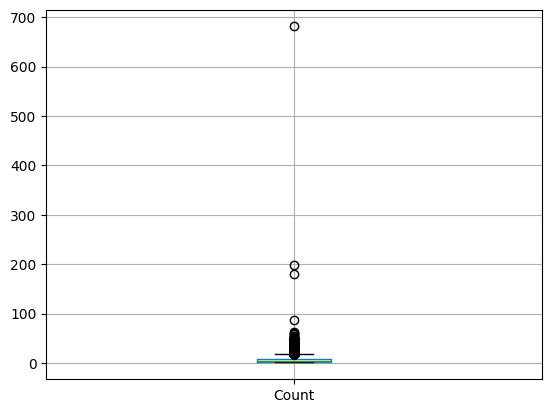

In [31]:
licensecounts.boxplot(column = 'Count')

Clearly the '0.0' is skewing our graph. The mean value shows us that on average, establishments in Chicago have recieved 6 inspections over the 13 year period. Lets zoom into the majority of the data.

<Axes: >

(0.0, 90.0)

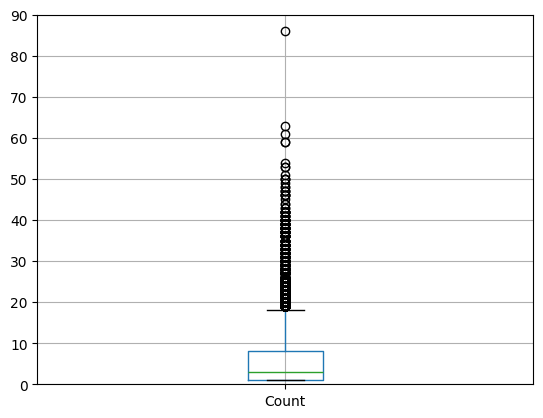

In [32]:
licensecounts.boxplot(column = 'Count')
plt.ylim(0, 90)

There are a lot of outliers, however for our case, being an outlier is not grounds for removal, as long as the data is accurate. We will drop the null and '0.0' cases, and the 'Risk' null cases while we are at it.

In [33]:
copy.dropna(subset=['License #'], inplace=True)
copy = copy[copy['License #'] != 0.0]
copy.dropna(subset=['Risk'], inplace=True)
copy.reset_index(drop=True, inplace=True) #Resetting the index
copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260379 entries, 0 to 260378
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Inspection ID    260379 non-null  int64  
 1   DBA Name         260379 non-null  object 
 2   AKA Name         257981 non-null  object 
 3   License #        260379 non-null  float64
 4   Facility Type    255578 non-null  object 
 5   Risk             260379 non-null  object 
 6   Address          260379 non-null  object 
 7   City             260202 non-null  object 
 8   State            260321 non-null  object 
 9   Zip              260379 non-null  float64
 10  Inspection Date  260379 non-null  object 
 11  Inspection Type  260379 non-null  object 
 12  Results          260379 non-null  object 
 13  Violations       189663 non-null  object 
 14  Latitude         259493 non-null  float64
 15  Longitude        259493 non-null  float64
 16  Location         260379 non-null  obje

The 'Lisense #' column is now ready to use.

All of these steps seem to have also taken care of all the null cases in 'Location'.

In [34]:
copy[copy['Location'].isnull()].head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location,ALat,ALong


But it turns out that there are several null values we missed in the Location column due to them being stored as 'nan' strings. We can try to populate these cells with the corresponding address cells useing geopy again.

In [35]:
#Location nulls:
copy[copy['Location']=='nan'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 886 entries, 216 to 260234
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Inspection ID    886 non-null    int64  
 1   DBA Name         886 non-null    object 
 2   AKA Name         879 non-null    object 
 3   License #        886 non-null    float64
 4   Facility Type    876 non-null    object 
 5   Risk             886 non-null    object 
 6   Address          886 non-null    object 
 7   City             886 non-null    object 
 8   State            886 non-null    object 
 9   Zip              886 non-null    float64
 10  Inspection Date  886 non-null    object 
 11  Inspection Type  886 non-null    object 
 12  Results          886 non-null    object 
 13  Violations       651 non-null    object 
 14  Latitude         0 non-null      float64
 15  Longitude        0 non-null      float64
 16  Location         886 non-null    object 
 17  ALat            

We could try to populate teh missing locations the same way we populated the missing zips but instead using the Address column. However, we can see that all corresponding zips are populated, so for the sake of this analysis, we do not need to populate the null locations since the zip codes are enough for us to determine the area in which the establishment is located. 

So it is not worth the effort for us to use the addresses to populate the missing location since we are not concerned with exact locations. We will leave the Location nulls as is.

In [36]:
copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260379 entries, 0 to 260378
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Inspection ID    260379 non-null  int64  
 1   DBA Name         260379 non-null  object 
 2   AKA Name         257981 non-null  object 
 3   License #        260379 non-null  float64
 4   Facility Type    255578 non-null  object 
 5   Risk             260379 non-null  object 
 6   Address          260379 non-null  object 
 7   City             260202 non-null  object 
 8   State            260321 non-null  object 
 9   Zip              260379 non-null  float64
 10  Inspection Date  260379 non-null  object 
 11  Inspection Type  260379 non-null  object 
 12  Results          260379 non-null  object 
 13  Violations       189663 non-null  object 
 14  Latitude         259493 non-null  float64
 15  Longitude        259493 non-null  float64
 16  Location         260379 non-null  obje

# Dropping irrelevant variables

In [37]:
copy = copy.drop(['Inspection ID', 'AKA Name', 'Facility Type', 'City', 'State', 'Violations', 'Latitude', 'Longitude', 'ALat', 'ALong'], axis = 1)
copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260379 entries, 0 to 260378
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   DBA Name         260379 non-null  object 
 1   License #        260379 non-null  float64
 2   Risk             260379 non-null  object 
 3   Address          260379 non-null  object 
 4   Zip              260379 non-null  float64
 5   Inspection Date  260379 non-null  object 
 6   Inspection Type  260379 non-null  object 
 7   Results          260379 non-null  object 
 8   Location         260379 non-null  object 
dtypes: float64(2), object(7)
memory usage: 17.9+ MB


In [38]:
copy.to_excel('food_inspection_final.xlsx', header = True, index = False)

# EDA Phase 2

As a reminder, the goal of this project is to do a spatial analysis of food inspections in the Chicago area by mapping all inspection types and inspection results over all zip codes. I hypothasize that zip codes with more establishments, and therefore more competion, will have a worse pass/fail ratio than establishments in zip codes with a sparcer number of establishments. I will also seek to answer if the number of establishments in a zip code is the primary determinant of the frequency of food inspections in this zip code.

Expanding on this, my approach will be zip code centered. That is to say, I will be not be mapping each establishment for this project, but will instead be centering my analysis around each zip code and comparing the results. Therefore any spatial trends in the data will have a resolution of a typical Chicago zip code.

In [39]:
#loading in cleaned data file
df =  pd.read_excel('food_inspection_final.xlsx')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260379 entries, 0 to 260378
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   DBA Name         260379 non-null  object
 1   License #        260379 non-null  int64 
 2   Risk             260379 non-null  object
 3   Address          260379 non-null  object
 4   Zip              260379 non-null  int64 
 5   Inspection Date  260379 non-null  object
 6   Inspection Type  260379 non-null  object
 7   Results          260379 non-null  object
 8   Location         259493 non-null  object
dtypes: int64(2), object(7)
memory usage: 17.9+ MB


,DBA Name,License #,Risk,Address,Zip,Inspection Date,Inspection Type,Results,Location
0,CERES' TABLE,2137239,Risk 1 (High),3124 N BROADWAY,60657,10/13/2023,Canvass,Out of Business,"(41.93841197166044, -87.64449180403412)"
1,BRITISH INTERNATIONAL SCHOOL OF CHICAGO LINCOL...,2718080,Risk 1 (High),821 W EASTMAN ST,60642,10/13/2023,Canvass,Pass,"(41.90735030771109, -87.64917064303643)"
2,DOG HAUS,2536489,Risk 1 (High),2464-2466 N LINCOLN AVE,60614,10/13/2023,Complaint,Fail,"(41.92674471870681, -87.65078998020067)"
3,KINZIE HOTEL,2608572,Risk 2 (Medium),20 W KINZIE ST,60654,10/13/2023,Canvass,Pass,"(41.889352033013864, -87.62884885027287)"
4,BRUNA'S CAFE,1212,Risk 1 (High),2424 S OAKLEY AVE,60608,10/12/2023,Canvass,Fail,"(41.847573840855105, -87.68321583947979)"


Note that the sring 'nan' values present in the location columns have been correctly interpreted as null values over the course of writing out and reading in the cleaned file. We will leave the null values as is, because as stated in EDA Phase 1, we are more concerned with the Zip values than the the exact location.

# Zip Code Grouping of all Inspections and Establishments
I want to start with sorting our data by the Zip. I aim to visually ascertain where the most number of inspections are happening, and how this is affected by the number of restraurants in an area. I wish to answer if the number of inspections in a zip code are directly proportional to the number establishments that are and have been present in that zip code.

To do this I will first map out all the unique zips present in the data.

In [40]:
uzip = df['Zip'].unique().astype(int).astype(str)
uzip
len(uzip)

array(['60657', '60642', '60614', '60654', '60608', '60632', '60637',
       '60660', '60661', '60618', '60611', '60634', '60625', '60638',
       '60647', '60612', '60644', '60615', '60607', '60605', '60628',
       '60610', '60643', '60613', '60629', '60620', '60639', '60631',
       '60653', '60666', '60616', '60651', '60630', '60640', '60646',
       '60619', '60626', '60624', '60649', '60622', '60623', '60617',
       '60602', '60659', '60604', '60601', '60621', '60603', '60641',
       '60645', '60609', '60652', '60707', '60655', '60606', '60636',
       '60656', '60565', '60827', '60302', '60633', '60706', '46410',
       '90067', '60805', '60402', '60585', '60193', '60126', '60035',
       '60409', '60201', '60804', '60153', '60007', '60076', '60714',
       '60077', '60148', '60429', '60478', '60501', '60440', '60047',
       '60453', '60022', '60482', '60803', '60202', '60459', '60173',
       '90504', '46394', '60137', '60053', '60455', '46319', '60102',
       '10014', '530

121

We can see that we have 121 unique entries in the Zip column. I will map these zip codes out on a map of the Chicago area.

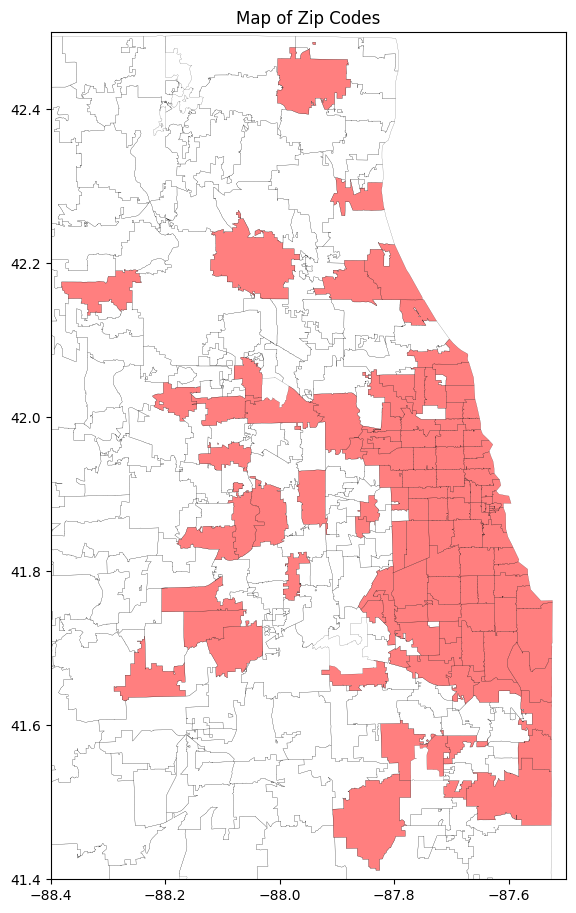

In [41]:
gdf = gpd.read_file('il_illinois_zip_codes_geo.min.json')
tgdf = gdf[gdf['ZCTA5CE10'].isin(uzip)]

fig, ax = plt.subplots(figsize=(8, 11))
gdf.boundary.plot(ax=ax, linewidth=0.1, color='black')
tgdf.plot(ax=ax, color='red', alpha=0.5)
ax.set_xlim(-88.4, -87.5)  
ax.set_ylim(41.4, 42.5) 
plt.title("Map of Zip Codes");

Here we can see that we have restraurants from all across the city.

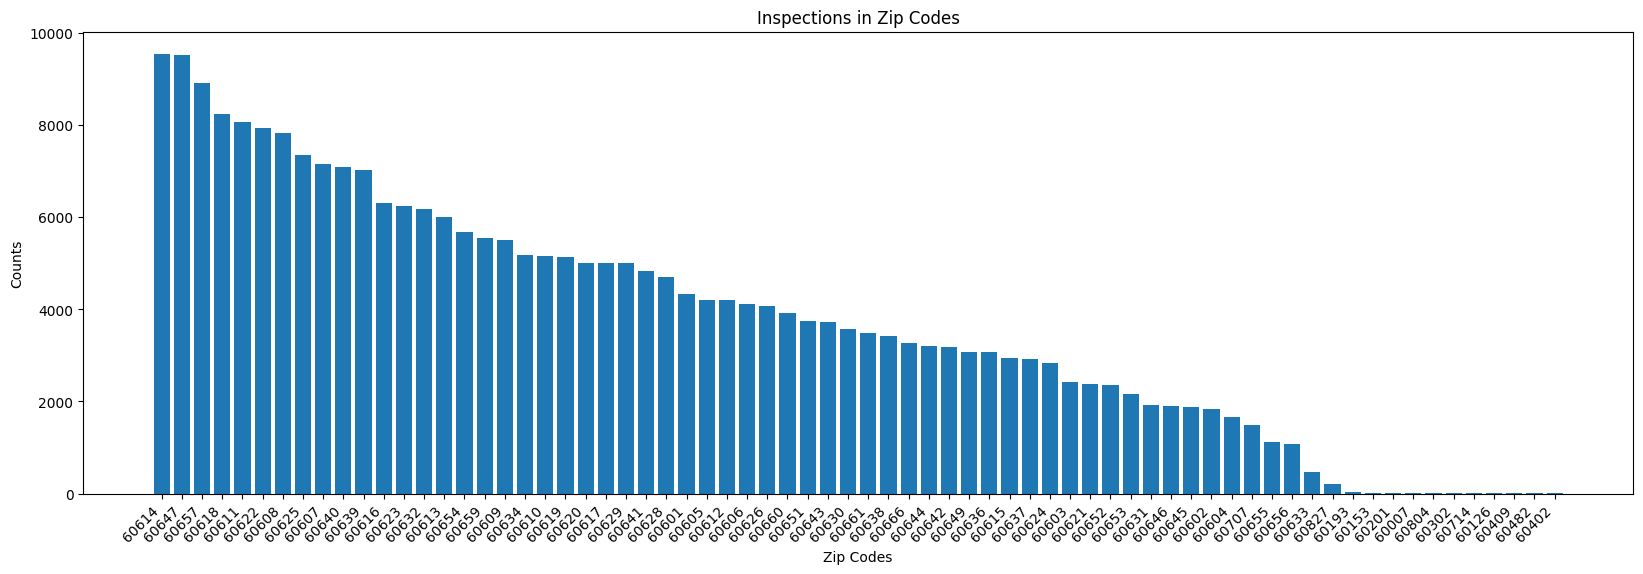

In [42]:
zip_code_counts = df['Zip'].astype(int).astype(str).value_counts().head(70)
plt.figure(figsize=(20, 6))
plt.bar(zip_code_counts.index, zip_code_counts.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Zip Codes')
plt.ylabel('Counts')
plt.title('Inspections in Zip Codes');

From the histogram it is evident that the count of zips drops to double and single digits after the first 60 most represented zip codes. It may be useful to map out these zips to see where they are located.

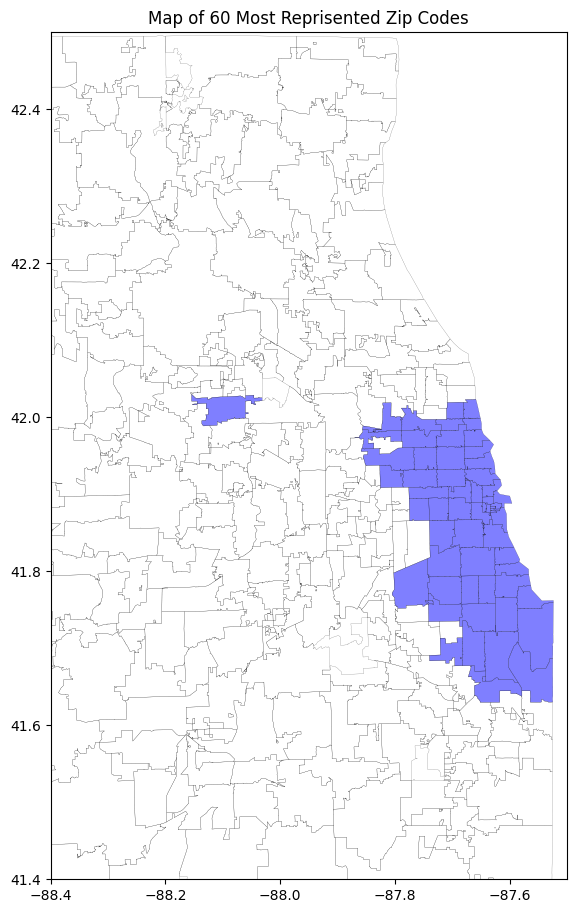

In [43]:
#Top 60 most represented zip codes zip codes in the df
zip_code_counts = df['Zip'].astype(int).astype(str).value_counts().head(60)
tgdf = gdf[gdf['ZCTA5CE10'].isin(zip_code_counts.index)]

fig, ax = plt.subplots(figsize=(8, 11))
gdf.boundary.plot(ax=ax, linewidth=0.1, color='black')
tgdf.plot(ax=ax, color='blue', alpha=0.5)
ax.set_xlim(-88.4, -87.5)  
ax.set_ylim(41.4, 42.5) 
plt.title("Map of 60 Most Reprisented Zip Codes");

Here we can see that the most populated zip codes are clustered together near the main city, with Lincoln Park having had the most inspections in the 10 year period. After the first 77 highest counts, the remaining zip codes are only represented 3 or fewer times.

I will now create a heat map of inspections by zip code, leaving out zip codes that are populated with only 3 or less inspections.

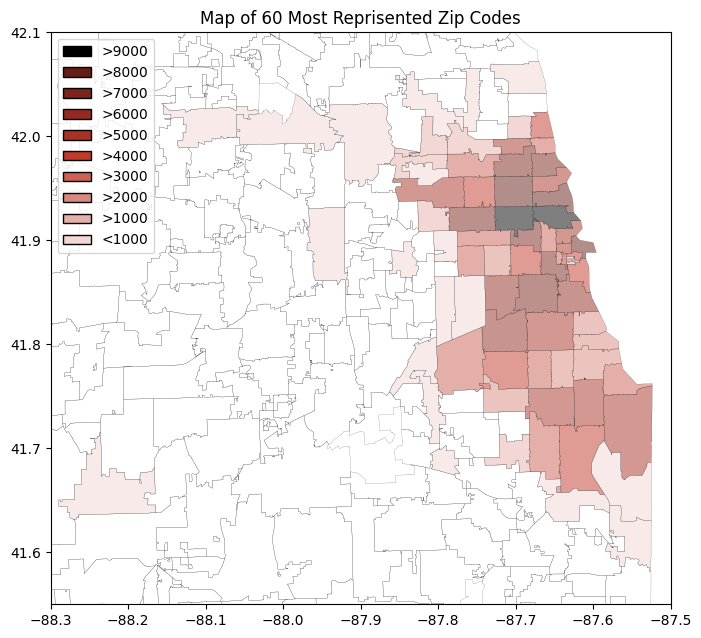

In [44]:
# Grouping by 1000 count groups
zip_code_counts = df['Zip'].astype(int).astype(str).value_counts().head(77)

ninez = zip_code_counts[zip_code_counts.values>=9000].index
eightz = zip_code_counts[(zip_code_counts.values >= 8000) & (zip_code_counts < 9000)].index
sevenz = zip_code_counts[(zip_code_counts >= 7000) & (zip_code_counts < 8000)].index
sixz = zip_code_counts[(zip_code_counts >= 6000) & (zip_code_counts < 7000)].index
fivez = zip_code_counts[(zip_code_counts >= 5000) & (zip_code_counts < 6000)].index
fourz = zip_code_counts[(zip_code_counts >= 4000) & (zip_code_counts < 5000)].index
threez = zip_code_counts[(zip_code_counts >= 3000) & (zip_code_counts < 4000)].index
twoz = zip_code_counts[(zip_code_counts >= 2000) & (zip_code_counts < 3000)].index
onez = zip_code_counts[(zip_code_counts >= 1000) & (zip_code_counts < 2000)].index
zeroz = zip_code_counts[(zip_code_counts < 1000)].index

tgdf9 = gdf[gdf['ZCTA5CE10'].isin(ninez)]
tgdf8 = gdf[gdf['ZCTA5CE10'].isin(eightz)]
tgdf7 = gdf[gdf['ZCTA5CE10'].isin(sevenz)]
tgdf6 = gdf[gdf['ZCTA5CE10'].isin(sixz)]
tgdf5 = gdf[gdf['ZCTA5CE10'].isin(fivez)]
tgdf4 = gdf[gdf['ZCTA5CE10'].isin(fourz)]
tgdf3 = gdf[gdf['ZCTA5CE10'].isin(threez)]
tgdf2 = gdf[gdf['ZCTA5CE10'].isin(twoz)]
tgdf1 = gdf[gdf['ZCTA5CE10'].isin(onez)]
tgdf0 = gdf[gdf['ZCTA5CE10'].isin(zeroz)]

fig, ax = plt.subplots(figsize=(8, 11))
gdf.boundary.plot(ax=ax, linewidth=0.1, color='black')
tgdf9.plot(ax=ax, color='#000000', alpha=0.5)
tgdf8.plot(ax=ax, color='#641E16', alpha=0.5)
tgdf7.plot(ax=ax, color='#7B241C', alpha=0.5)
tgdf6.plot(ax=ax, color='#922B21', alpha=0.5)
tgdf5.plot(ax=ax, color='#A93226', alpha=0.5)
tgdf4.plot(ax=ax, color='#C0392B', alpha=0.5)
tgdf3.plot(ax=ax, color='#CD6155', alpha=0.5)
tgdf2.plot(ax=ax, color='#D98880', alpha=0.5)
tgdf1.plot(ax=ax, color='#E6B0AA', alpha=0.5)
tgdf0.plot(ax=ax, color='#F2D7D5', alpha=0.5)
legend_elements = [Patch(facecolor='#000000', edgecolor='black', label='>9000'),
                   Patch(facecolor='#641E16', edgecolor='black', label='>8000'), 
                   Patch(facecolor='#7B241C', edgecolor='black', label='>7000'), 
                   Patch(facecolor='#922B21', edgecolor='black', label='>6000'), 
                   Patch(facecolor='#A93226', edgecolor='black', label='>5000'), 
                   Patch(facecolor='#C0392B', edgecolor='black', label='>4000'), 
                   Patch(facecolor='#CD6155', edgecolor='black', label='>3000'), 
                   Patch(facecolor='#D98880', edgecolor='black', label='>2000'), 
                   Patch(facecolor='#E6B0AA', edgecolor='black', label='>1000'), 
                   Patch(facecolor='#F2D7D5', edgecolor='black', label='<1000')]
ax.legend(handles=legend_elements, loc='upper left')
ax.set_xlim(-88.3, -87.5)  
ax.set_ylim(41.55, 42.1) 
plt.title("Map of 60 Most Reprisented Zip Codes");

I constructed this heat map by first groouping the zip code counts into groups of 1000. I then plotted the groups using different groups on the same map. The geo jason file was used to provide an outline of zip codes.

Again we can clearly see that inspections are clustered around the main city. This raises the question: Are zip code counts directly proportional with Licence # counts? That is, are the number of inspections proportional to the number of establishments in the area? To answer this question we will have to repeat the steps taken above for License numbers.

In [45]:
#Creating a dictionary with zip keys and associated license numbers
uzipf = uzip.astype(float)
lic ={}
for zip in uzipf:
    #zipstring = str(zip)
    lic[zip] = df['License #'][df['Zip'] == zip]

In [46]:
#Creating a new dataframe countaining 'Zip', 'Unique Licenses'and 'Inspections in Zip'
pd.set_option('display.max_rows', 121)
unique_lic_count = []
for key in lic.keys():
    unique_lic_count.append(len(lic[key].unique()))
    
IinZip = []
for zip in uzipf:
    IinZip.append(len(df['Zip'][df['Zip']==zip]))

uzlcount = pd.DataFrame(columns=['Zip', 'Unique Licenses', 'Inspections in Zip'])
uzlcount['Zip'] = uzip
uzlcount['Unique Licenses'] = unique_lic_count
uzlcount['Inspections in Zip'] = IinZip
uzlcount = uzlcount.sort_values(by='Unique Licenses', ascending=False)
uzlcount.describe()

,Unique Licenses,Inspections in Zip
count,121.000000,121.000000
mean,361.876033,2151.892562
std,469.434706,2729.620229
min,1.000000,1.000000
25%,1.000000,2.000000
50%,8.000000,16.000000
75%,681.000000,4076.000000
max,1787.000000,9548.000000


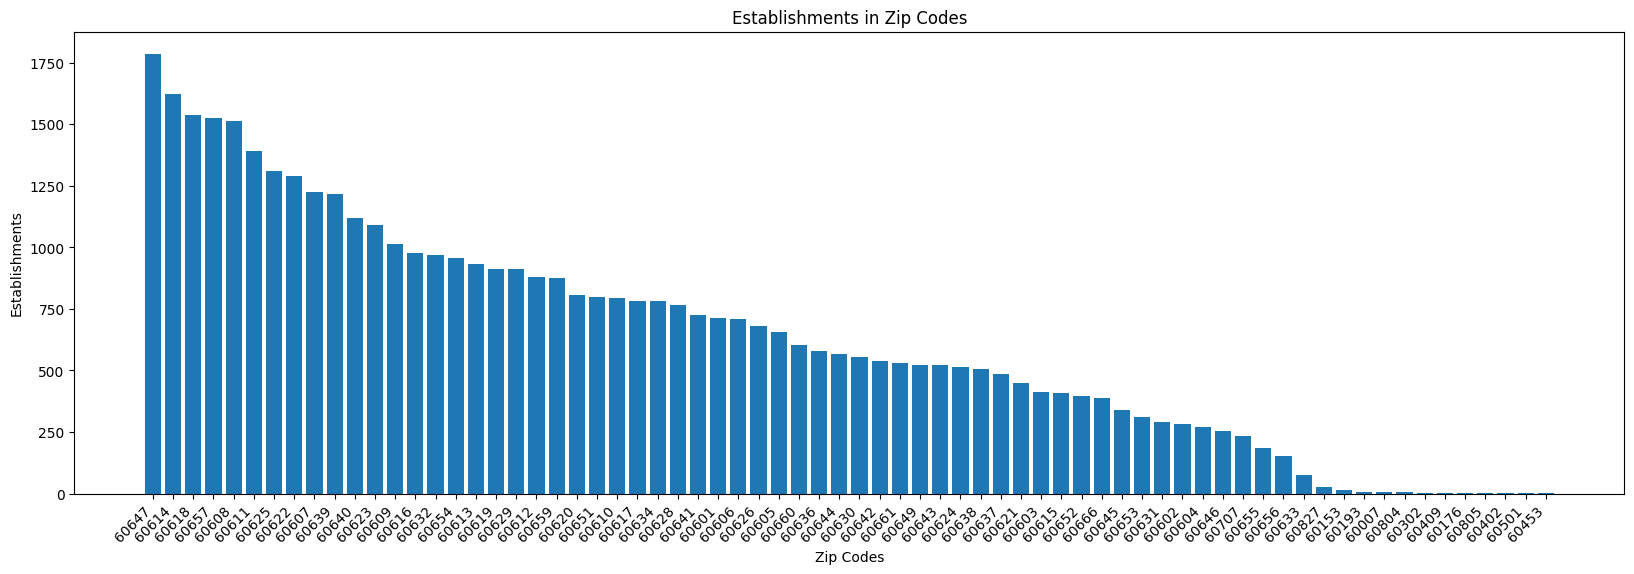

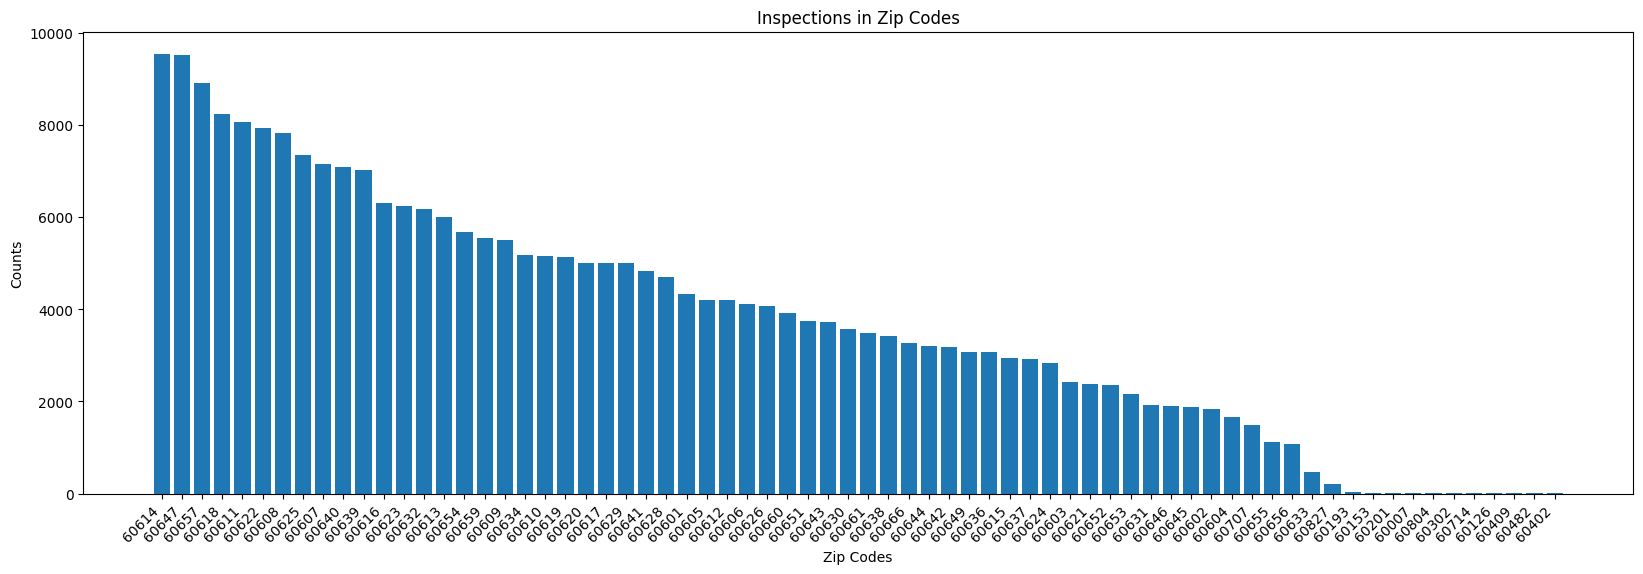

In [47]:
plt.figure(figsize=(20, 6))
plt.bar(uzlcount['Zip'].head(70), uzlcount['Unique Licenses'].head(70))
plt.xticks(rotation=45, ha='right')
plt.xlabel('Zip Codes')
plt.ylabel('Establishments')
plt.title('Establishments in Zip Codes')

zip_code_counts = df['Zip'].astype(int).astype(str).value_counts().head(70)
plt.figure(figsize=(20, 6))
plt.bar(zip_code_counts.index, zip_code_counts.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Zip Codes')
plt.ylabel('Counts')
plt.title('Inspections in Zip Codes');

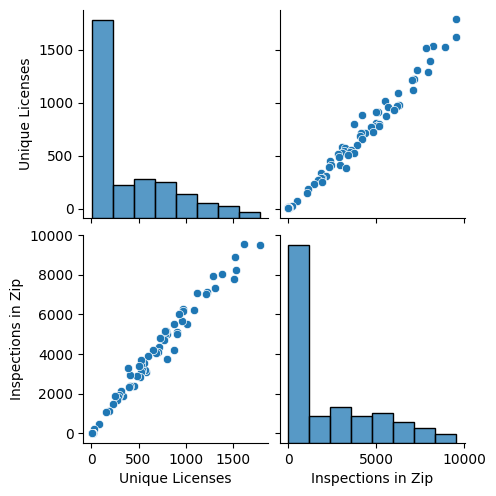

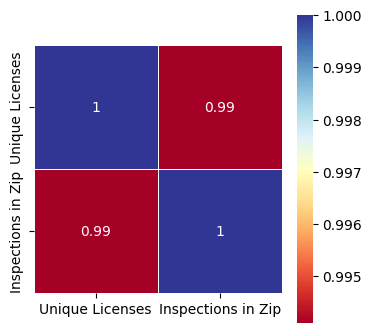

In [48]:
sns.pairplot(uzlcount[['Unique Licenses', 'Inspections in Zip']])
f, ax = plt.subplots(figsize = (4, 4))
sns.heatmap(uzlcount[['Unique Licenses', 'Inspections in Zip']].corr(), square = True, annot = True, cmap = 'RdYlBu', linewidths = .5 );

From the above bar, pair and heat maps, we can safely say that the number of inspections in a zip code is closely related to the number of establishments present in the zipcode. From the bar plots we can also notice there are number of discrepencies between the order of the zip codes. Since both bar plots have been sorted so that their bins go from the highest to lowest counts, we can see that certain zip codes have more establishments than the number of inspections would suggest they have, and vice versa. Inspite of this, the correlations matrix and the pairplots show us that the two measures are highly correlated.

To finish, I will make a heat map of the Chicago area for the number of establishments in each zip. I will do this by grouping the zip codes by the number of establishments in the zip. The intervals are chosen so that they disect the counts equivalently to the divisions made for the previous heat map. That is, 187 was chosen from the following calculation:

The heat map of zip counts was divided into 10 groups of 1000, with a maximum of 1000 * 9 = 10000. The highest count of zips was 9548. (9549/10000) * (upper limit of the highest interwal of the new heat map for Licenses) = 1788. (upper limit of the highest interwal of the new heat map for Licenses) = 1788/0.9549 = 1872.4. Dividing this by 10 and we get the size of our interwals; 187 counts.

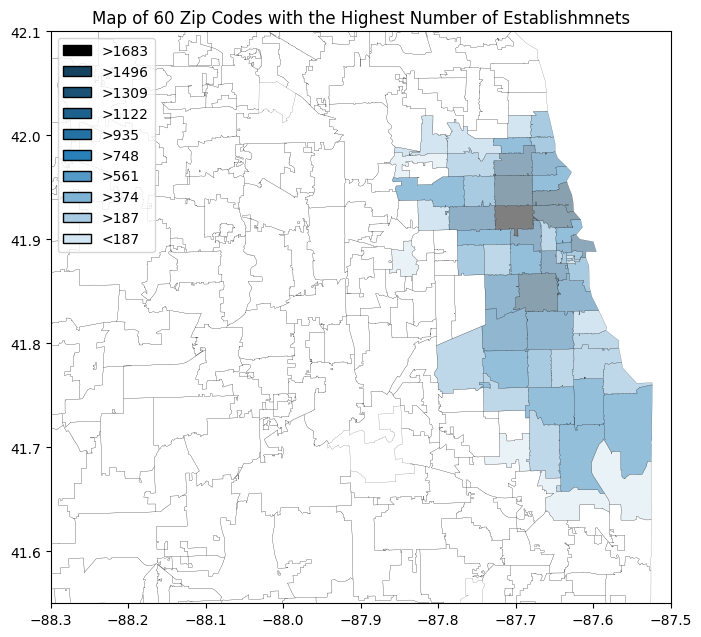

In [49]:
pd.set_option('display.max_rows', 121)
#Dividing into equivalent groups 
ninel = uzlcount['Zip'].head(60)[uzlcount['Unique Licenses'] >= 1683]
eightl = uzlcount['Zip'].head(60)[(uzlcount['Unique Licenses'] >= 1496) & (uzlcount['Unique Licenses'] < 1683)]
sevenl = uzlcount['Zip'].head(60)[(uzlcount['Unique Licenses'] >= 1309) & (uzlcount['Unique Licenses'] < 1496)]
sixl = uzlcount['Zip'].head(60)[(uzlcount['Unique Licenses'] >= 1122) & (uzlcount['Unique Licenses'] < 1309)]
fivel = uzlcount['Zip'].head(60)[(uzlcount['Unique Licenses'] >= 935) & (uzlcount['Unique Licenses'] < 1122)]
fourl = uzlcount['Zip'].head(60)[(uzlcount['Unique Licenses'] >= 748) & (uzlcount['Unique Licenses'] < 935)]
threel = uzlcount['Zip'].head(60)[(uzlcount['Unique Licenses'] >= 561) & (uzlcount['Unique Licenses'] < 748)]
twol = uzlcount['Zip'].head(60)[(uzlcount['Unique Licenses'] >= 374) & (uzlcount['Unique Licenses'] < 561)]
onel = uzlcount['Zip'].head(60)[(uzlcount['Unique Licenses'] >= 187) & (uzlcount['Unique Licenses'] < 374)]
zerol = uzlcount['Zip'].head(60)[uzlcount['Unique Licenses']<187]

tgdf9 = gdf[gdf['ZCTA5CE10'].isin(ninel)]
tgdf8 = gdf[gdf['ZCTA5CE10'].isin(eightl)]
tgdf7 = gdf[gdf['ZCTA5CE10'].isin(sevenl)]
tgdf6 = gdf[gdf['ZCTA5CE10'].isin(sixl)]
tgdf5 = gdf[gdf['ZCTA5CE10'].isin(fivel)]
tgdf4 = gdf[gdf['ZCTA5CE10'].isin(fourl)]
tgdf3 = gdf[gdf['ZCTA5CE10'].isin(threel)]
tgdf2 = gdf[gdf['ZCTA5CE10'].isin(twol)]
tgdf1 = gdf[gdf['ZCTA5CE10'].isin(onel)]
tgdf0 = gdf[gdf['ZCTA5CE10'].isin(zerol)]

fig, ax = plt.subplots(figsize=(8, 11))
gdf.boundary.plot(ax=ax, linewidth=0.1, color='black')
tgdf9.plot(ax=ax, color='#000000', alpha=0.5)
tgdf8.plot(ax=ax, color='#154360', alpha=0.5)
tgdf7.plot(ax=ax, color='#1A5276', alpha=0.5)
tgdf6.plot(ax=ax, color='#1F618D', alpha=0.5)
tgdf5.plot(ax=ax, color='#2471A3', alpha=0.5)
tgdf4.plot(ax=ax, color='#2980B9', alpha=0.5)
tgdf3.plot(ax=ax, color='#5499C7', alpha=0.5)
tgdf2.plot(ax=ax, color='#7FB3D5', alpha=0.5)
tgdf1.plot(ax=ax, color='#A9CCE3', alpha=0.5)
tgdf0.plot(ax=ax, color='#D4E6F1', alpha=0.5)
legend_elements = [Patch(facecolor='#000000', edgecolor='black', label='>1683'),
                   Patch(facecolor='#154360', edgecolor='black', label='>1496'), 
                   Patch(facecolor='#1A5276', edgecolor='black', label='>1309'), 
                   Patch(facecolor='#1F618D', edgecolor='black', label='>1122'), 
                   Patch(facecolor='#2471A3', edgecolor='black', label='>935'), 
                   Patch(facecolor='#2980B9', edgecolor='black', label='>748'), 
                   Patch(facecolor='#5499C7', edgecolor='black', label='>561'), 
                   Patch(facecolor='#7FB3D5', edgecolor='black', label='>374'), 
                   Patch(facecolor='#A9CCE3', edgecolor='black', label='>187'), 
                   Patch(facecolor='#D4E6F1', edgecolor='black', label='<187')]

ax.legend(handles=legend_elements, loc='upper left')
ax.set_xlim(-88.3, -87.5)  
ax.set_ylim(41.55, 42.1) 
plt.title("Map of 60 Zip Codes with the Highest Number of Establishmnets");

Comparing this map to the one called for the zip counts, we can see that the two maps line up well. Furthermore the ratio of establishments to inspections is fairly consistent for the 60 most populated zip codes. Again, the reason we have chosen only the 60 or so most populated zips to construct this ratio and all previous bar plots and heatmaps is because the number of restraunts and inspections in zip codes below this mark drop off significantly, creating more fluctuation in the ratio defined above, while only being a negligible fraction of the data. The table below shows the key statistics of this ratio and the boxplot below shows that there are only 3 outliers.

This tells us that, as expected, inspections increase proportionally with the number of establishments in the area, with minimal deviation from this trend.

,Unique Licenses,Inspections in Zip,Inspections Establishments Ratio
count,60.000000,60.000000,60.000000
mean,728.000000,4336.300000,6.060749
std,421.667513,2351.325687,0.943726
min,14.000000,16.000000,1.142857
25%,410.250000,2726.750000,5.701229
50%,695.500000,4097.000000,6.098752
75%,960.500000,5756.000000,6.457303
max,1787.000000,9548.000000,8.479275


<Axes: >

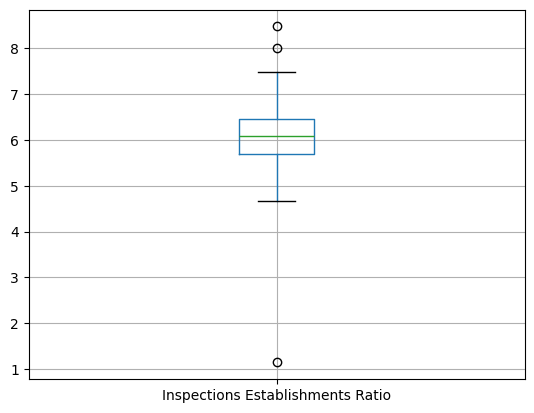

In [50]:
uzlcount['Inspections Establishments Ratio'] = uzlcount['Inspections in Zip']/uzlcount['Unique Licenses']
uzlcount.head(60).describe()
uzlcount.head(60).boxplot(column = 'Inspections Establishments Ratio')

# Results by zip code
The goal here is to construct a pass/fail map over all zip codes with a sufficiently significant establishment population size over the ten year period. Let us start by looking at the Results column of our data frame.

In [51]:
df['Results'].head()
df['Results'].tail()
df['Results'].unique()

0    Out of Business
1               Pass
2               Fail
3               Pass
4               Fail
Name: Results, dtype: object

260374                  Pass
260375                  Fail
260376    Pass w/ Conditions
260377                  Fail
260378                  Pass
Name: Results, dtype: object

array(['Out of Business', 'Pass', 'Fail', 'No Entry', 'Not Ready',
       'Pass w/ Conditions', 'Business Not Located'], dtype=object)

Results with a 'Out of Business', 'No Entry', 'Not Ready' and 'Business Not Located' do not concern us.

In [52]:
uselessL = ['Out of Business', 'No Entry', 'Not Ready', 'Business Not Located']
uselessR = df['Results'][df['Results'].isin(uselessL)]
uselessR

0         Out of Business
6         Out of Business
7                No Entry
17              Not Ready
20        Out of Business
               ...       
255620    Out of Business
255763    Out of Business
255836    Out of Business
255851    Out of Business
259609    Out of Business
Name: Results, Length: 35585, dtype: object

In [53]:
#New df with only pass and fail data.
usefulL = ['Pass', 'Fail', 'Pass w/ Conditions']
ZRdf = pd.DataFrame(columns=['License #', 'Zip', 'Results'])

ZRdf['License #'] = df['License #'][df['Results'].isin(usefulL)]
ZRdf['Zip'] = df['Zip'][df['Results'].isin(usefulL)]
ZRdf['Results'] = df['Results'][df['Results'].isin(usefulL)]
ZRdf['Results'].unique()
ZRdf.info()

array(['Pass', 'Fail', 'Pass w/ Conditions'], dtype=object)

<class 'pandas.core.frame.DataFrame'>
Index: 224794 entries, 1 to 260378
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   License #  224794 non-null  int64 
 1   Zip        224794 non-null  int64 
 2   Results    224794 non-null  object
dtypes: int64(2), object(1)
memory usage: 6.9+ MB


Useing this new data frame, I will construct another data frame that sums our chosen inspection results over all unique zip codes.

In [54]:
#New df summing results for all unique zip codes in ZRdf
uzZRdf = ZRdf['Zip'].unique()
uZRdf = pd.DataFrame(columns=['Zip', 'All Establishments', 'Pass', 'Pass w/ Conditions', 'Fail', 'All Inspections'])

for zip in uzZRdf:
    establishments_count = len(ZRdf['License #'][ZRdf['Zip'] == zip].value_counts())
    pass_count = ZRdf['Results'][(ZRdf['Zip'] == zip) & (ZRdf['Results'] == 'Pass')].count()
    pass_conditions_count = ZRdf['Results'][(ZRdf['Zip'] == zip) & (ZRdf['Results'] == 'Pass w/ Conditions')].count()
    fail_count = ZRdf['Results'][(ZRdf['Zip'] == zip) & (ZRdf['Results'] == 'Fail')].count()

    uZRdf.loc[len(uZRdf)] = {
        'Zip': zip,
        'All Establishments': establishments_count,
        'Pass': pass_count,
        'Pass w/ Conditions': pass_conditions_count,
        'Fail': fail_count,
        'All Inspections': pass_count + pass_conditions_count + fail_count
    }
    
uZRdf['Fail %'] = (uZRdf['Fail']/uZRdf['All Inspections'])*100
uZRdf.info()


<class 'pandas.core.frame.DataFrame'>
Index: 118 entries, 0 to 117
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Zip                 118 non-null    int64  
 1   All Establishments  118 non-null    int64  
 2   Pass                118 non-null    int64  
 3   Pass w/ Conditions  118 non-null    int64  
 4   Fail                118 non-null    int64  
 5   All Inspections     118 non-null    int64  
 6   Fail %              118 non-null    float64
dtypes: float64(1), int64(6)
memory usage: 7.4 KB


I will now remove zip codes that have fewer than 10 establishments present over the ten year period, because they will add significant variation to our ratio data while constituting a marginal percentage of the total population.

In [55]:
#Removing zips with less than 10 Establishments & converting zip to string
uZRdf = uZRdf[uZRdf['All Establishments']>= 10]
uZRdf['Zip'] =uZRdf['Zip'].astype(int).astype(str)
uZRdf = uZRdf.sort_values(by='Fail %', ascending=False)
uZRdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 33 to 26
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Zip                 60 non-null     object 
 1   All Establishments  60 non-null     int64  
 2   Pass                60 non-null     int64  
 3   Pass w/ Conditions  60 non-null     int64  
 4   Fail                60 non-null     int64  
 5   All Inspections     60 non-null     int64  
 6   Fail %              60 non-null     float64
dtypes: float64(1), int64(5), object(1)
memory usage: 3.8+ KB


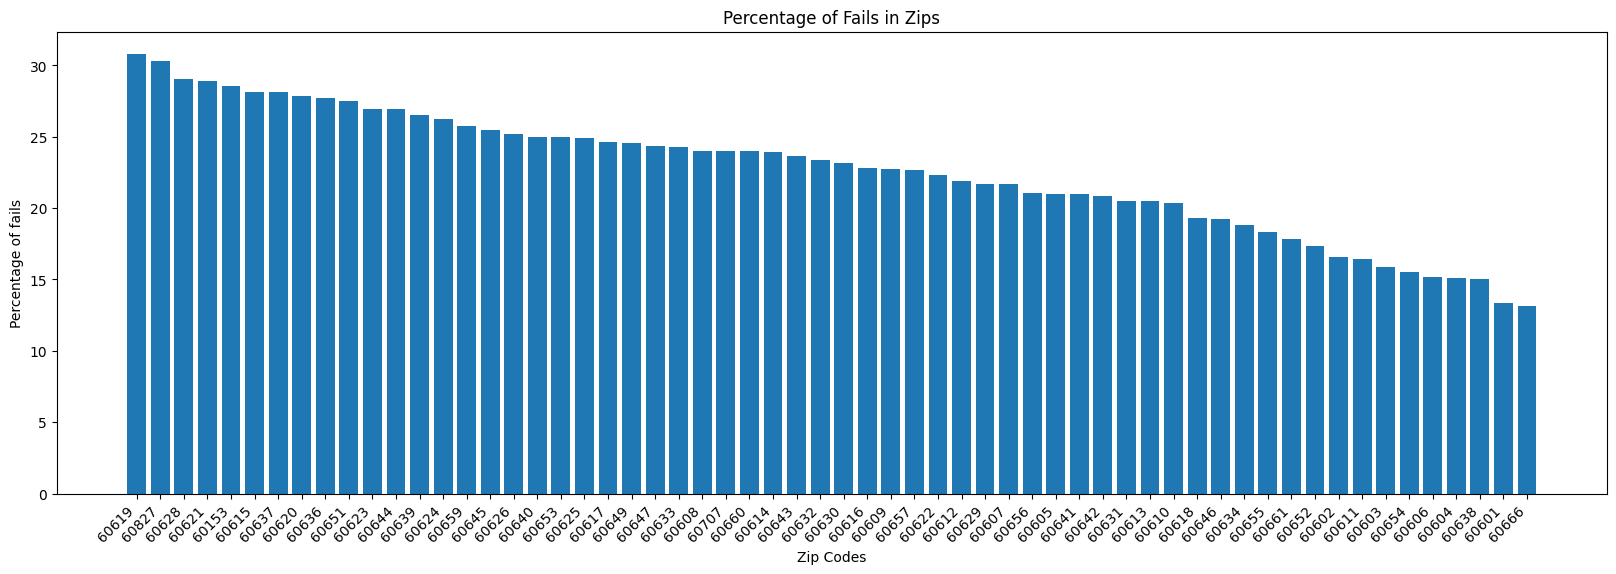

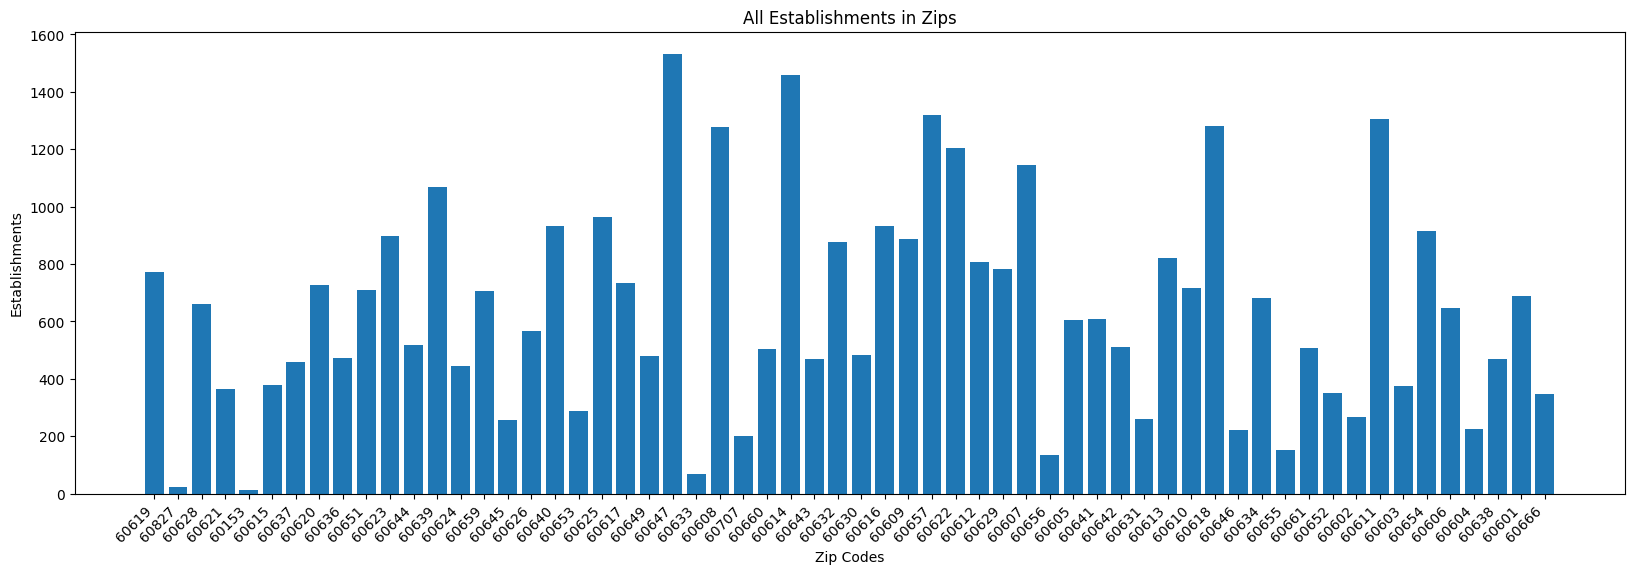

In [56]:
#Box plot of Fail % and All Establishments
plt.figure(figsize=(20, 6))
plt.bar(uZRdf['Zip'], uZRdf['Fail %'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Zip Codes')
plt.ylabel('Percentage of fails')
plt.title('Percentage of Fails in Zips')

plt.figure(figsize=(20, 6))
plt.bar(uZRdf['Zip'], uZRdf['All Establishments'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Zip Codes')
plt.ylabel('Establishments')
plt.title('All Establishments in Zips');

For the purpose visualizing the comparison of the 2 measures plotted above, I will construct two heat maps of zip codes based on the zips' Fail % and number of Establishments.

In [57]:
uZRdf.describe()

,All Establishments,Pass,Pass w/ Conditions,Fail,All Inspections,Fail %
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,640.983333,2233.766667,665.416667,844.350000,3743.533333,22.606413
std,367.616855,1157.087963,404.919799,482.980465,1994.841844,4.434021
min,12.000000,10.000000,0.000000,4.000000,14.000000,13.139876
25%,371.750000,1406.500000,338.250000,481.750000,2319.000000,20.074072
50%,606.500000,2200.000000,638.000000,775.500000,3569.500000,23.244682
75%,879.500000,3007.750000,893.250000,1200.250000,4980.250000,25.531619
max,1533.000000,4587.000000,1839.000000,1936.000000,8054.000000,30.818327


The interwals breakup for the heat maps will be as follows: The range of All Establishments is 1522. Dividing this into 7 intervals of size 200 will yield an appropriate gradient for this data. Fail % has a range of 17.7. Equivalently, we will divide this range into 7 interwals of 2, starting at 18 and going all the way up to 30.

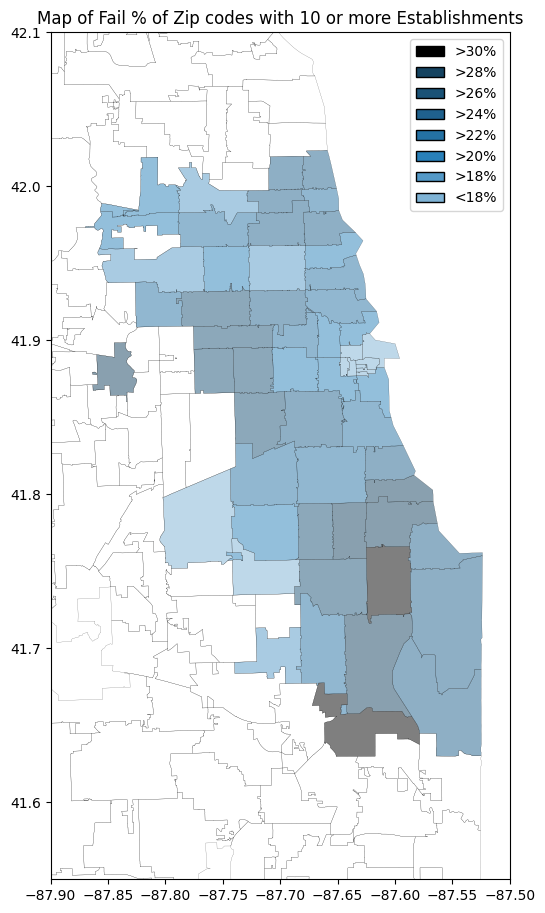

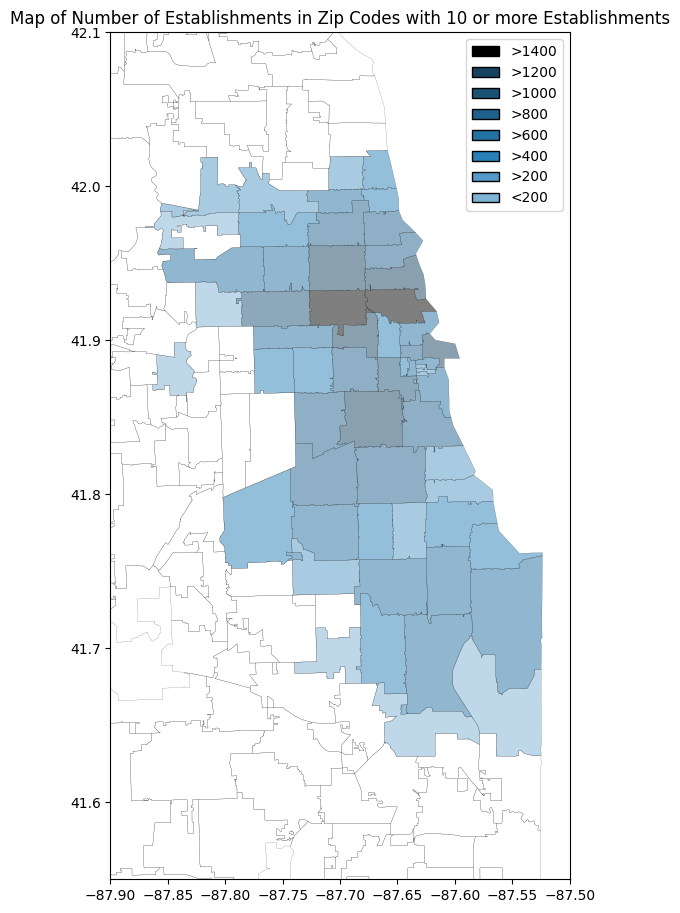

In [58]:
niner = uZRdf['Zip'][uZRdf['Fail %'] >= 30]
eightr = uZRdf['Zip'][(uZRdf['Fail %'] >= 28) & (uZRdf['Fail %'] < 30)]
sevenr = uZRdf['Zip'][(uZRdf['Fail %'] >= 26) & (uZRdf['Fail %'] < 28)]
sixr = uZRdf['Zip'][(uZRdf['Fail %'] >= 24) & (uZRdf['Fail %'] < 26)]
fiver = uZRdf['Zip'][(uZRdf['Fail %'] >= 22) & (uZRdf['Fail %'] < 24)]
fourr = uZRdf['Zip'][(uZRdf['Fail %'] >= 20) & (uZRdf['Fail %'] < 22)]
threer = uZRdf['Zip'][(uZRdf['Fail %'] >= 18) & (uZRdf['Fail %'] < 20)]
twor = uZRdf['Zip'][uZRdf['Fail %']<18]

tgdf9 = gdf[gdf['ZCTA5CE10'].isin(niner)]
tgdf8 = gdf[gdf['ZCTA5CE10'].isin(eightr)]
tgdf7 = gdf[gdf['ZCTA5CE10'].isin(sevenr)]
tgdf6 = gdf[gdf['ZCTA5CE10'].isin(sixr)]
tgdf5 = gdf[gdf['ZCTA5CE10'].isin(fiver)]
tgdf4 = gdf[gdf['ZCTA5CE10'].isin(fourr)]
tgdf3 = gdf[gdf['ZCTA5CE10'].isin(threer)]
tgdf2 = gdf[gdf['ZCTA5CE10'].isin(twor)]

fig, ax = plt.subplots(figsize=(8, 11))
gdf.boundary.plot(ax=ax, linewidth=0.1, color='black')
tgdf9.plot(ax=ax, color='#000000', alpha=0.5)
tgdf8.plot(ax=ax, color='#154360', alpha=0.5)
tgdf7.plot(ax=ax, color='#1A5276', alpha=0.5)
tgdf6.plot(ax=ax, color='#1F618D', alpha=0.5)
tgdf5.plot(ax=ax, color='#2471A3', alpha=0.5)
tgdf4.plot(ax=ax, color='#2980B9', alpha=0.5)
tgdf3.plot(ax=ax, color='#5499C7', alpha=0.5)
tgdf2.plot(ax=ax, color='#7FB3D5', alpha=0.5)

legend_elements = [Patch(facecolor='#000000', edgecolor='black', label='>30%'),
                   Patch(facecolor='#154360', edgecolor='black', label='>28%'), 
                   Patch(facecolor='#1A5276', edgecolor='black', label='>26%'), 
                   Patch(facecolor='#1F618D', edgecolor='black', label='>24%'), 
                   Patch(facecolor='#2471A3', edgecolor='black', label='>22%'), 
                   Patch(facecolor='#2980B9', edgecolor='black', label='>20%'), 
                   Patch(facecolor='#5499C7', edgecolor='black', label='>18%'), 
                   Patch(facecolor='#7FB3D5', edgecolor='black', label='<18%')]

ax.legend(handles=legend_elements, loc='upper right')
ax.set_xlim(-87.9, -87.5)  
ax.set_ylim(41.55, 42.1) 
plt.title("Map of Fail % of Zip codes with 10 or more Establishments");


ninee = uZRdf['Zip'][uZRdf['All Establishments'] >= 1400]
eighte = uZRdf['Zip'][(uZRdf['All Establishments'] >= 1200) & (uZRdf['All Establishments'] < 1400)]
sevene = uZRdf['Zip'][(uZRdf['All Establishments'] >= 1000) & (uZRdf['All Establishments'] < 1200)]
sixe = uZRdf['Zip'][(uZRdf['All Establishments'] >= 800) & (uZRdf['All Establishments'] < 1000)]
fivee = uZRdf['Zip'][(uZRdf['All Establishments'] >= 600) & (uZRdf['All Establishments'] < 800)]
foure = uZRdf['Zip'][(uZRdf['All Establishments'] >= 400) & (uZRdf['All Establishments'] < 600)]
threee = uZRdf['Zip'][(uZRdf['All Establishments'] >= 200) & (uZRdf['All Establishments'] < 400)]
twoe = uZRdf['Zip'][uZRdf['All Establishments']<200]

tgdf9 = gdf[gdf['ZCTA5CE10'].isin(ninee)]
tgdf8 = gdf[gdf['ZCTA5CE10'].isin(eighte)]
tgdf7 = gdf[gdf['ZCTA5CE10'].isin(sevene)]
tgdf6 = gdf[gdf['ZCTA5CE10'].isin(sixe)]
tgdf5 = gdf[gdf['ZCTA5CE10'].isin(fivee)]
tgdf4 = gdf[gdf['ZCTA5CE10'].isin(foure)]
tgdf3 = gdf[gdf['ZCTA5CE10'].isin(threee)]
tgdf2 = gdf[gdf['ZCTA5CE10'].isin(twoe)]

fig, ax = plt.subplots(figsize=(8, 11))
gdf.boundary.plot(ax=ax, linewidth=0.1, color='black')
tgdf9.plot(ax=ax, color='#000000', alpha=0.5)
tgdf8.plot(ax=ax, color='#154360', alpha=0.5)
tgdf7.plot(ax=ax, color='#1A5276', alpha=0.5)
tgdf6.plot(ax=ax, color='#1F618D', alpha=0.5)
tgdf5.plot(ax=ax, color='#2471A3', alpha=0.5)
tgdf4.plot(ax=ax, color='#2980B9', alpha=0.5)
tgdf3.plot(ax=ax, color='#5499C7', alpha=0.5)
tgdf2.plot(ax=ax, color='#7FB3D5', alpha=0.5)

legend_elements = [Patch(facecolor='#000000', edgecolor='black', label='>1400'),
                   Patch(facecolor='#154360', edgecolor='black', label='>1200'), 
                   Patch(facecolor='#1A5276', edgecolor='black', label='>1000'), 
                   Patch(facecolor='#1F618D', edgecolor='black', label='>800'), 
                   Patch(facecolor='#2471A3', edgecolor='black', label='>600'), 
                   Patch(facecolor='#2980B9', edgecolor='black', label='>400'), 
                   Patch(facecolor='#5499C7', edgecolor='black', label='>200'), 
                   Patch(facecolor='#7FB3D5', edgecolor='black', label='<200')]

ax.legend(handles=legend_elements, loc='upper right')
ax.set_xlim(-87.9, -87.5)  
ax.set_ylim(41.55, 42.1) 
plt.title("Map of Number of Establishments in Zip Codes with 10 or more Establishments");


From the above plots, it appears as if there is no correlation between the amount of 'Fails' and the number of Establishments in a given zip code. The zip codes with the highest fail percentage are 60619 and 60827. The population size of establishments in these zips vary significantly, yet both have high failure percentages. Broadley, it can be seen in the box plots that while sorted by descending fail percentages, the population size varies significantly, with seemingly no trend.

Finally I will construct correlation a matrix to measure the correlation of the above measures.

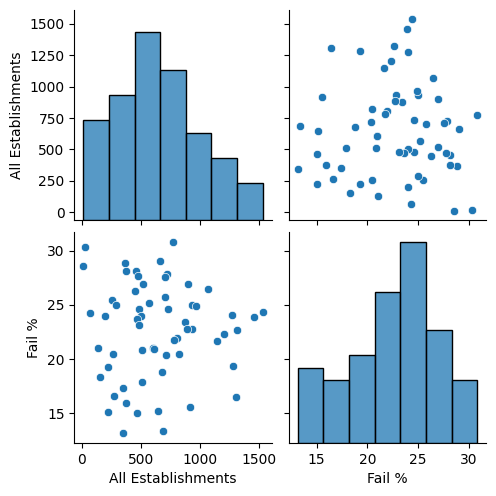

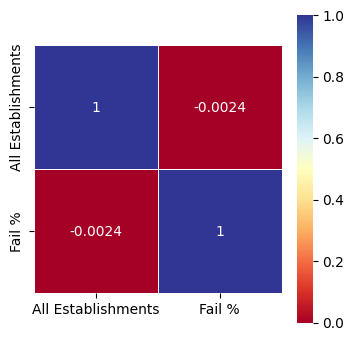

In [60]:
sns.pairplot(uZRdf[['All Establishments', 'Fail %']])
f, ax = plt.subplots(figsize = (4, 4))
sns.heatmap(uZRdf[['All Establishments', 'Fail %']].corr(), square = True, annot = True, cmap = 'RdYlBu', linewidths = .5 );

It is clear that there is no correltaion between how popular a zip code is for dining purposes, and how poorly the given establishments in that zip code perform in a food inspection.